In [6]:
from scipy.stats import (
    norm, binom, expon, t, chi2, pareto, ttest_ind, ttest_1samp,
    sem, beta, kstwobign, randint, kstest, shapiro, jarque_bera,
)
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.proportion import proportion_confint
from tqdm.notebook import tqdm
import numpy as numpy
from seaborn import distplot
from matplotlib import pyplot
import seaborn

import sys
sys.path.append('.')

import warnings
warnings.filterwarnings("ignore")

In [7]:
def inverse_plot_colorscheme():
    import cycler
    def invert(color_to_convert): 
        table = str.maketrans('0123456789abcdef', 'fedcba9876543210')
        return '#' + color_to_convert[1:].lower().translate(table).upper()
    update_dict = {}
    for key, value in pyplot.rcParams.items():
        if value == 'black':
            update_dict[key] = 'white'
        elif value == 'white':
            update_dict[key] = 'black'
    
    old_cycle = pyplot.rcParams['axes.prop_cycle']
    new_cycle = []
    for value in old_cycle:
        new_cycle.append({
            'color': invert(value['color'])
        })
    pyplot.rcParams.update(update_dict)
    pyplot.rcParams['axes.prop_cycle'] = cycler.Cycler(new_cycle)
    lec = pyplot.rcParams['legend.edgecolor']
    lec = str(1 - float(lec))
    pyplot.rcParams['legend.edgecolor'] = lec

In [8]:
inverse_plot_colorscheme()

# –õ–µ–∫—Ü–∏—è 8. –ö—Ä–∏—Ç–µ—Ä–∏–∏ —Å–æ–≥–ª–∞—Å–∏—è

## –ö—Ä–∏—Ç–µ—Ä–∏–π —Å–æ–≥–ª–∞—Å–∏—è 

*–∏–ª–∏ (goodness of fit)*

> üìà **–ó–∞–¥–∞—á–∞**
>
> –í—ã –∫—É–ø–∏–ª–∏ –Ω–æ–≤—ã–π –∫—Ä–∞—Å–∏–≤—ã–π –∏–≥—Ä–∞–ª—å–Ω—ã–π –∫—É–±–∏–∫ –∏ —Ö–æ—Ç–∏—Ç–µ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, –ø—Ä–∞–≤–¥–∞ –ª–∏, —á—Ç–æ –≤—Å–µ –≥—Ä–∞–Ω–∏ —É –Ω–µ–≥–æ –≤—ã–ø–∞–¥–∞—é—Ç —Ä–∞–≤–Ω–æ–≤–µ—Ä–æ—è—Ç–Ω–æ? 



–ü—É—Å—Ç—å –º—ã –Ω–∞–∫–∏–¥–∞–ª–∏ –∫—É–±–∏–∫ n —Ä–∞–∑, –∏ —É –Ω–∞—Å –ø–æ—è–≤–∏–ª–∞—Å—å –≤—ã–±–æ—Ä–∫–∞ $X_1, X_2 \dots X_n$. –ö–∞–∫ –ø–æ–Ω—è—Ç—å, —á–µ—Å—Ç–Ω—ã–π –ª–∏ –∫—É–±–∏–∫? –î–ª—è —ç—Ç–æ–≥–æ –Ω–∞–º –ø–æ–º–æ–≥—É—Ç –∫—Ä–∏—Ç–µ—Ä–∏–∏ —Å–æ–≥–ª–∞—Å–∏—è!

–ö–∞–∫—É—é –∑–∞–¥–∞—á—É –æ–Ω–∏ —Ä–µ—à–∞—é—Ç? –ï—Å—Ç—å –≤—ã–±–æ—Ä–∫–∞ $X_1, X_2 \dots X_n$ –∏–∑ –∏—Å—Ç–∏–Ω–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $\mathcal{P}$. –ú—ã —Ö–æ—Ç–∏–º –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, –∞ —Å–æ–≤–ø–∞–¥–∞–µ—Ç –ª–∏ $\mathcal{P}$ —Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º $\mathcal{P_0}$?
   - –ù–∞–ø—Ä–∏–º–µ—Ä, –ø—É—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã–ø–∞–¥–µ–Ω–∏–π –≥—Ä–∞–Ω–µ–π –∫—É–±–∏–∫–∞ $p_1, p_2, p_3, p_4, p_5, p_6$ (–≠—Ç–æ $\mathcal{P}$). –ù–∞—Å –∏–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç, –∞ –Ω–µ —Ä–∞–≤–Ω–æ–≤–µ—Ä–æ—è—Ç–Ω—ã –ª–∏ –≤—Å–µ –≥—Ä–∞–Ω–∏, —Ç–æ –µ—Å—Ç—å $p_i = \dfrac{1}{6}$ –¥–ª—è –ª—é–±–æ–≥–æ i (–≠—Ç–æ $\mathcal{P_0}$). –ê –Ω–∞—à–∞ –≤—ã–±–æ—Ä–∫–∞ $X_i$ &mdash; —Ä–µ–∑—É–ª—å—Ç–∞—Ç i-–æ–≥–æ –±—Ä–æ—Å–∫–∞ –∫—É–±–∏–∫–∞. 
       - –° —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —Ç–µ–æ—Ä–∏–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —á–∏—Å–ª–æ –≤—ã–ø–∞–¥–µ–Ω–∏–π –∫–∞–∂–¥–æ–π –≥—Ä–∞–Ω–∏ –∫—É–±–∏–∫–∞ –ø—Ä–∏ N –±—Ä–æ—Å–∫–∞—Ö –æ–ø–∏—Å—ã–≤–∞–µ—Ç—Å—è [–º—É–ª—å—Ç–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º](https://ru.wikipedia.org/wiki/–ú—É–ª—å—Ç–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–µ_—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ).

–¢–æ –µ—Å—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π —Å–æ–≥–ª–∞—Å–∏—è –ø—Ä–æ–≤–µ—Ä—è–µ—Ç
- $H_0: \mathcal{P} = \mathcal{P}_0\ vs.\ H_1: \mathcal{P} \neq \mathcal{P}_0$.

–ù–æ –∏–Ω–æ–≥–¥–∞ –Ω–∞—Å –∏–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç —Ä–∞–≤–µ–Ω—Å—Ç–≤–æ –Ω–µ –æ–¥–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é $\mathcal{P}_0$, –∞ —Å–µ–º–µ–π—Å—Ç–≤—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π. –ù–∞–ø—Ä–∏–º–µ—Ä, –Ω–∞—Å –∏–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç, –ø—Ä–∞–≤–¥–∞ –ª–∏, —á—Ç–æ –≤—ã–±–æ—Ä–∫–∞ $X_1, X_2 \dots X_n$ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è? –ì–∏–ø–æ—Ç–µ–∑–∞ –≤—ã—à–µ –ø—Ä–æ–≤–µ—Ä–∏–ª–∞ –±—ã, —á—Ç–æ –≤—ã–±–æ—Ä–∫–∞ $X$ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ $\mu, \sigma^2$.

–ü–æ—ç—Ç–æ–º—É –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –µ—Å—Ç—å **2 –≥–∏–ø–æ—Ç–µ–∑—ã —É –∫—Ä–∏—Ç–µ—Ä–∏—è —Å–æ–≥–ª–∞—Å–∏—è**:
- *–ü—Ä–æ—Å—Ç–∞—è*: $H_0: \mathcal{P} = \mathcal{P}_0\ vs.\ H_1: \mathcal{P} \neq \mathcal{P}_0$
- *–°–ª–æ–∂–Ω–∞—è*: $H_0: \mathcal{P} \in \{\mathcal{P}_{\theta}| \theta \in \Theta \}$. –¢–æ –µ—Å—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–µ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω—ã.
    - –î–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $ \{\mathcal{P}_{\theta}| \theta \in \Theta \}$:
        - $\mathcal{P}$  &mdash; –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, 
        - $\theta$ —ç—Ç–æ –ø–∞—Ä–∞ $(\mu, \sigma^2)$
        - $\Theta = (-\infty, \infty) \times (0, \infty)$ (–¥–µ–∫–∞—Ä—Ç–æ–≤–æ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ –¥–≤—É—Ö –º–Ω–æ–∂–µ—Å—Ç–≤)

#### –ö—Ä–∏—Ç–µ—Ä–∏–π –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞ –¥–ª—è –ø—Ä–æ—Å—Ç–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã

–°—Ñ–æ–∫—É—Å–∏—Ä—É–µ–º—Å—è –Ω–∞ –ø—Ä–æ—Å—Ç–æ–π –≥–∏–ø–æ—Ç–µ–∑–µ: $H_0: \mathcal{P} = \mathcal{P}_0\ vs.\ H_1: \mathcal{P} \neq \mathcal{P}_0$. –ù–æ –∑–∞–º–µ—Ç–∏–º, —á—Ç–æ —ç—Ç—É –∑–∞–ø–∏—Å—å –º–æ–∂–Ω–æ –∏–∑–º–µ–Ω–∏—Ç—å: –≤–º–µ—Å—Ç–æ —Ç–æ–≥–æ, —á—Ç–æ–±—ã —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å —Å–∞–º–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –º—ã –º–æ–∂–µ–º —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –º–µ–∂–¥—É —Å–æ–±–æ–π. –¢–∞–∫ –∫–∞–∫ [—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ –∑–∞–¥–∞–µ—Ç—Å—è —Å–≤–æ–µ–π —Ñ—É–Ω–∫—Ü–∏–µ–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è](https://stats.stackexchange.com/questions/136658/why-does-a-cumulative-distribution-function-cdf-uniquely-define-a-distribution).

–ü–æ—ç—Ç–æ–º—É –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –º—ã –±—É–¥–µ–º –ø–∏—Å–∞—Ç—å, —á—Ç–æ –∫—Ä–∏—Ç–µ—Ä–∏–π —Å–æ–≥–ª–∞—Å–∏—è –ø—Ä–æ–≤–µ—Ä—è–µ—Ç $H_0: F = F_0\ vs.\ H_1: F \neq F_0$, *–≥–¥–µ $F, F_0$ &mdash; —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è*.

–ù—É –∞ —Ç–µ–ø–µ—Ä—å –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω—ã–π –≤–æ–ø—Ä–æ—Å: –∫–∞–∫ –ø—Ä–æ–≤–µ—Ä—è—Ç—å —Ç–∞–∫—É—é –≥–∏–ø–æ—Ç–µ–∑—É? **–î–ª—è —ç—Ç–æ–≥–æ –Ω–∞–º –Ω–∞–¥–æ –ø—Ä–∏–¥—É–º–∞—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –∏ –∫–∞–∫ –æ–Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –ø—Ä–∏ $H_0$**.



**–®–∞–≥ 1. –û—Ü–µ–Ω–∏–≤–∞–µ–º CDF, –∏–ª–∏ $F(x)$**

–ù–∞—á–Ω–µ–º –∏–∑–¥–∞–ª–µ–∫–∞. –ü–æ–ø—Ä–æ–±—É–µ–º —Ä–µ—à–∏—Ç—å —Ç–∞–∫—É—é –∑–∞–¥–∞—á—É: –∫–∞–∫ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∏—Ä–æ–≤–∞—Ç—å `cdf` –≤—ã–±–æ—Ä–∫–∏? –ú—ã –µ–µ –Ω–µ –∑–Ω–∞–µ–º, –Ω–æ —Ö–æ—Ç–∏–º –∫–∞–∫-—Ç–æ —Ç–æ—á–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å. –ß—Ç–æ —Ç–∞–∫–æ–µ cdf –ø–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é? –≠—Ç–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø–æ–ª—É—á–∏—Ç—å —Ç–∞–∫–æ–µ –∏–ª–∏ –±–æ–ª–µ–µ –º–∞–ª–µ–Ω—å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã, $F(x) = P(X \leq x)$. –¢–æ–≥–¥–∞ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ –≤—ã–±–æ—Ä–∫–µ:

$$\widehat{F_n}(x) = \frac{1}{n}\sum_i[X_i \leqslant x]$$

–û–Ω–∞ –ø–æ —Å–º—ã—Å–ª—É –¥–æ–ª–∂–Ω–∞ –æ—Ü–µ–Ω–∏–≤–∞—Ç—å $F(x)$. –ù–∞–∑–æ–≤–µ–º **$\widehat{F_n}(x)$ &mdash; —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è**.

–ß—Ç–æ –º–æ–∂–Ω–æ –ø—Ä–æ —ç—Ç—É –æ—Ü–µ–Ω–∫—É —Å–∫–∞–∑–∞—Ç—å: **–Ω–∞ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç–∏ $\widehat{F_n}(x) \stackrel{p}{\rightarrow} F(x)$**. ([—Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –ø–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏](https://tvims.nsu.ru/chernova/tv/lec/node53.html))

---

*–î–æ–∫-–≤–æ*

- $F(x) = P(X \leq x) = 1 *  P(X \leq x) + 0 * P(X > x) = \mathbb{E} I\{X \leq x\}$, –≥–¥–µ $I$ &mdash; —Ñ—É–Ω–∫—Ü–∏—è –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä. –û–Ω–∞ —Ä–∞–≤–Ω–∞ 1, –µ—Å–ª–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–æ —É—Å–ª–æ–≤–∏–µ –≤ —Å–∫–æ–±–∫–∞—Ö.
- $\widehat{F_n}(x) = \frac{1}{n}\sum_i[X_i \leqslant x] = \overline{I\{X \leq x\}}$

–¢–æ–≥–¥–∞ –ø–æ —É—Å–∏–ª–µ–Ω–Ω–æ–º—É –∑–∞–∫–æ–Ω—É –±–æ–ª—å—à–∏—Ö —á–∏—Å–µ–ª (–£–ó–ë–ß):

$\widehat{F_n}(x) = \overline{I\{X \leq x\}} \stackrel{p}{\rightarrow} \mathbb{E} I\{X \leq x\} = F(x)$. —á.—Ç.–¥.

---

–î–∞–≤–∞–π—Ç–µ —ç—Ç–æ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º.

- –í–æ–∑—å–º–µ–º –Ω–µ–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ) –∏ –ª—é–±—É—é —Ç–æ—á–∫—É, –Ω–∞–ø—Ä–∏–º–µ—Ä, 3.
- –ü–æ—Å—á–∏—Ç–∞–µ–º –≤ –Ω–µ–π –∏—Å—Ç–∏–Ω–Ω—É—é $F(x)$.
- –î–∞–ª–µ–µ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö n –ø–æ—Å—á–∏—Ç–∞–µ–º $\widehat{F_n}(x)$.
- –ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è $\widehat{F_n}(x) - F(x)$. –ß–µ–º –±–æ–ª—å—à–µ n, —Ç–µ–º –º–µ–Ω—å—à–µ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ.

In [4]:
def calc_Fn(sample, x):
    """
        –§—É–Ω–∫—Ü–∏—è —Å—Ç—Ä–æ–∏—Ç —ç–º–ø–∏—Ä–∏—á–µ—Å–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ sample –¥–ª—è Fn(x).
    """
    
    return numpy.mean(sample <= x)

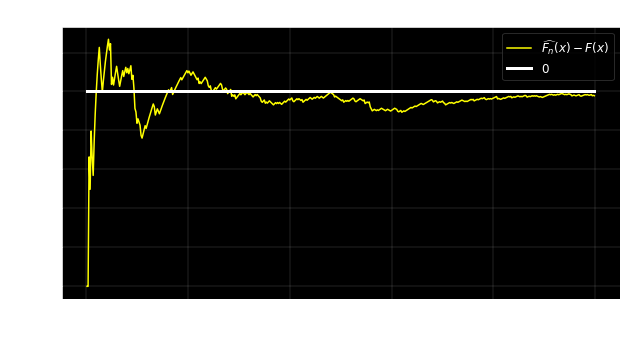

In [5]:
numpy.random.seed(42)
N = 5000
n_array = numpy.arange(10, N, 10)
# –í –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–º–µ—Ä–∞ –≤–∑—è–ª–∏ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
X = expon().rvs(N)
x = 3
F_x = expon().cdf(x)

delta = []
for n in n_array:
    # –°—á–∏—Ç–∞–µ–º F_n_x –ø–æ –ø–µ—Ä–≤—ã–º n —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º —Ç–æ—á–∫–∞–º
    F_n_x = calc_Fn(X[:n], x)
    delta.append(F_n_x - F_x)


pyplot.figure(figsize=(10, 5))
pyplot.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $\widehat{F_n}(x) - F(x)$, x —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω', fontsize=12)
pyplot.plot(n_array, delta, c='yellow', label='$\widehat{F_n}(x) - F({x})$')
pyplot.plot(n_array, [0] * len(n_array), c='white', linewidth=3, label='0')
pyplot.legend(fontsize=12)
pyplot.xlabel('–†–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏', fontsize=12)
pyplot.ylabel('$\delta$', fontsize=12)
pyplot.grid(linewidth=0.2)
pyplot.show()

–í–∏–¥–∏–º, —á—Ç–æ –≤—Å–µ —Ç–∞–∫ –∏ –µ—Å—Ç—å!

–ù–æ —á—Ç–æ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –≤ —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏ –¥–ª—è –≤—Å–µ—Ö x? –ö–∞–∫ $F_n(x)$ –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç $F(x)$ –≤ –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–µ x?

> **–¢–µ–æ—Ä–µ–º–∞ –ì–ª–∏–≤–µ–Ω–∫–æ-–ö–∞–Ω—Ç–µ–ª–ª–∏**
>
> –ü—É—Å—Ç—å $X_1, X_2 \dots $ &mdash; –≤—ã–±–æ—Ä–∫–∞ –Ω–µ–æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞ –∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å —Ñ—É–Ω–∫—Ü–∏–µ–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $F$. –¢–æ–≥–¥–∞
$$
    D_n = \underset{x \in \mathbb{R}}{\sup} |\widehat{F_n}(x) - F(x)| \stackrel{p}{\rightarrow} 0
$$

–¢–æ –µ—Å—Ç—å –Ω–∞–∏–±–æ–ª—å—à–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –Ω–∞—à–µ–π –æ—Ü–µ–Ω–∫–æ–π –∏ –∏—Å—Ç–∏–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ä–∞–≤–Ω–∞ 0! –≠—Ç–æ –µ—â–µ –±–æ–ª–µ–µ —Å–∏–ª—å–Ω–æ–µ —É—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏–µ —á–µ–º —Ç–æ, —á—Ç–æ –±—ã–ª–æ –≤—ã—à–µ: –æ–Ω–æ —Å—Ä–∞–∑—É –≥–æ–≤–æ—Ä–∏—Ç –ø—Ä–æ $|\widehat{F_n}(x) - F(x)|$, –Ω–∞ –≤—Å–µ–π —á–∏—Å–ª–æ–≤–æ–π –ø—Ä—è–º–æ–π, –∞ –Ω–µ –ø—Ä–æ –æ–¥–Ω—É —Ç–æ—á–∫—É, –∫–∞–∫ –º—ã –≤—ã–≤–µ–ª–∏ —Ä–∞–Ω–µ–µ.


–í—Ä–µ–º—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏:
- –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –≤—ã–±–æ—Ä–∫—É.
- –°—á–∏—Ç–∞–µ–º $F(x)$ –≤ –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–µ x.
- –°—á–∏—Ç–∞–µ–º $\widehat{F_n}(x)$ –≤ –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–µ x.
- –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç n.

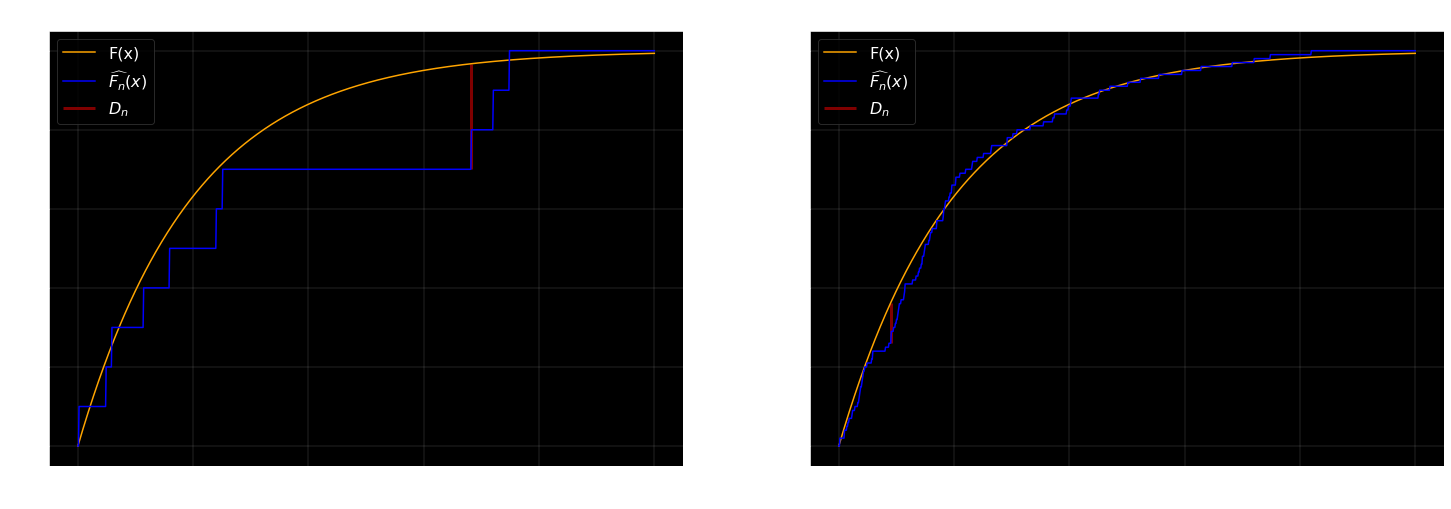

In [6]:
numpy.random.seed(4)
N = 1000
n_array = [10, 100]
X = expon().rvs(N)
# –í —ç—Ç–æ—Ç —Ä–∞–∑ –Ω–µ –æ–¥–Ω–∞ —Ç–æ—á–∫–∞, –∞ —á–∏—Å–ª–æ–≤–∞—è –ø—Ä—è–º–∞—è
x = numpy.linspace(0, 5, 1000)
F_x = expon().cdf(x)


pyplot.figure(figsize=(25, 8))


for ind, n in enumerate(n_array):
    F_n_x = numpy.array([calc_Fn(X[:n], x_dot) for x_dot in x])
    
    # –†–∏—Å—É–µ–º Dn –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ
    # –°—á–∏—Ç–∞–µ–º delta 
    delta = numpy.abs(F_n_x - F_x)
    # –ò—â–µ–º –∏–Ω–¥–µ–∫—Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è
    x_ind = numpy.argmax(delta)
    # –ü–æ –∏–Ω–¥–µ–∫—Å—É –ø–æ–ª—É—á–∞–µ–º —Ç–æ—á–∫—É x, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–π –Ω–∞–∏–±–æ–ª—å—à–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ
    dn_x_dot = x[x_ind]
    # –ò—â–µ–º –Ω–∏–∂–Ω—é—é –∏ –≤–µ—Ä—Ö–Ω—é—é —Ç–æ—á–∫–∏
    down_bound = min(F_n_x[x_ind], F_x[x_ind])
    up_bound = max(F_n_x[x_ind], F_x[x_ind])
    
    pyplot.subplot(1, 2, ind + 1)
    pyplot.title('$\widehat{F_n} - F$, ' + f'n={n}', fontsize=16)
    pyplot.plot(x, F_x, color="orange", label='F(x)')
    pyplot.plot(x, F_n_x,color="blue", label='$\widehat{F_n}(x)$')
    pyplot.vlines(dn_x_dot, down_bound, up_bound,
               color='maroon', linestyle='-', linewidth=3, label='$D_n$')
    pyplot.legend(fontsize=16)
    pyplot.grid(linewidth=0.2)
    pyplot.xlabel('x', fontsize=16)
    pyplot.ylabel('–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å', fontsize=16)

pyplot.show()

–ß–µ–º –±–æ–ª—å—à–µ n, —Ç–µ–º –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ –º—ã –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º $F(x)$ –Ω–∞ –≤c–µ–π —á–∏—Å–ª–æ–≤–æ–π –ø—Ä—è–º–æ–π.

**–ò—Ç–æ–≥–æ** –Ω–∞ —à–∞–≥–µ 1 –º—ã –ø–æ–ª—É—á–∏–ª–∏ –æ—Ü–µ–Ω–∫—É $F(x)$ –ø–æ –≤—ã–±–æ—Ä–∫–µ, –∫–æ—Ç–æ—Ä–∞—è —Å —Ä–æ—Å—Ç–æ–º n —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –≤—Å–µ –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ–π. –ù–æ –ø–æ–∫–∞ —ç—Ç–æ –Ω–µ –ø—Ä–∏–±–ª–∏–∑–∏–ª–æ –Ω–∞—Å –∫ –∫—Ä–∏—Ç–µ—Ä–∏—é.

-----

**–®–∞–≥ 2. –ü—Ä–∏–¥—É–º—ã–≤–∞–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –∫—Ä–∏—Ç–µ—Ä–∏—è –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞**

–ú—ã –Ω–∞—É—á–∏–ª–∏—Å—å –ø—Ä–∏–±–ª–∏–∂–∞—Ç—å $F(x)$. –¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –ø–æ–¥—É–º–∞–µ–º, —á—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ $F = F_0$? –ï—Å–ª–∏ —ç—Ç–æ —Ç–∞–∫, —Ç–æ 
    $$\begin{align}
        &\forall x \in \mathbb{R}\ F(x) = F_0(x) \Leftrightarrow \\
        &\forall x \in \mathbb{R}\ |F(x) - F_0(x)| = 0 \Leftrightarrow \\
        &\underset{x \in \mathbb{R}}{\sup} |F(x) - F_0(x)| = 0
    \end{align}
    $$
  
–•–º, —á—Ç–æ-—Ç–æ –ø–æ—Ö–æ–∂–µ–µ –Ω–∞ —Ç–æ, —á—Ç–æ –º—ã —Å—á–∏—Ç–∞–ª–∏ –≤ –ø—Ä–æ—à–ª–æ–º —à–∞–≥–µ... –î–∞–≤–∞–π—Ç–µ –∑–∞–º–µ–Ω–∏–º $F(x)$ –Ω–∞ –æ—Ü–µ–Ω–∫—É: —ç–º–ø–∏—Ä–∏—á–µ—Å–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –¢–æ–≥–¥–∞ **—Å—Ç–∞—Ç–∏c—Ç–∏–∫–∞ –∫—Ä–∏—Ç–µ—Ä–∏—è –±—É–¥–µ—Ç** 
$$
    D_n = \underset{x \in \mathbb{R}}{\sup} |\widehat{F_n}(x) - F_0(x)|
$$
–ò–º–µ–Ω–Ω–æ –µ–µ –ø—Ä–µ–¥–ª–æ–∂–∏–ª –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤ –≤ —Å–≤–æ–µ –≤—Ä–µ–º—è.

–ß—Ç–æ –º—ã –∑–Ω–∞–µ–º —É–∂–µ –ø—Ä–æ —ç—Ç—É –æ—Ü–µ–Ω–∫—É?
- –ü—Ä–∏ $H_0: D_n \stackrel{p}{\rightarrow} 0$

–ù–æ —ç—Ç–æ–≥–æ –º–∞–ª–æ: —Å –ø–æ–º–æ—â—å—é —ç—Ç–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–µ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å. –ù–∞–º –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

-----

**–®–∞–≥ 3. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞**


> –¢–µ–æ—Ä–µ–º–∞ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞
>
> –ü—É—Å—Ç—å –≤—ã–±–æ—Ä–∫–∞ $X$ –∏–∑ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –¢–æ–≥–¥–∞ –ø—Ä–∏ $H_0$ $\sqrt{n}D_n \stackrel{d}{\rightarrow} \phi$, –≥–¥–µ $\phi$ –∏–º–µ–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞: $F_\phi(x) = \begin{equation*} 
 \begin{cases}
  \sum\limits_{k=-\infty}^ \infty (-1)^k e^{-2k^2 x^2}, &\text{ $ x > 0$}\\
   0, &\text{ $ x < 0$}
 \end{cases}
\end{equation*}$

–¢–æ –µ—Å—Ç—å, —Å —Ä–æ—Å—Ç–æ–º n $D_n \rightarrow 0$, –∞ $\sqrt{n}D_n \rightarrow \phi$.

–î–∞–≤–∞–π—Ç–µ –≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞, –∏ –∫–∞–∫ –æ–Ω–∞ –≤–µ–¥–µ—Ç —Å–µ–±—è –ø—Ä–∏ –º–∞–ª—ã—Ö n. –î–ª—è —ç—Ç–æ–≥–æ –º—ã:

1. –°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º 1000 —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ –∏ –≤ –∫–∞–∂–¥–æ–º –∏–∑ –Ω–∏—Ö –ø–æ—Å—á–∏—Ç–∞–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É $\sqrt{n}D_n$.
2. –í –∫–∞–∂–¥–æ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ —Å–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –≤—ã–±–æ—Ä–∫—É.
3. –ü–æ—Å—á–∏—Ç–∞–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É D. –í–æ–ø—Ä–æ—Å —Å–æ—Å—Ç–æ–∏—Ç –≤ —Ç–æ–º, –≤ –∫–∞–∫–∏—Ö —Ç–æ—á–∫–∞—Ö —Å—á–∏—Ç–∞—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É? –¢–æ—á–µ–∫ $x$ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ –º–Ω–æ–≥–æ, –Ω–µ—É–∂–µ–ª–∏ –ø—Ä–æ–≤–µ—Ä—è—Ç—å –≤—Å–µ?
    - **–ù–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –ª–∏—à—å —Ç–æ—á–∫–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è $\widehat{F_n}(x)$. –ê –µ–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ–Ω—è—é—Ç—Å—è –ª–∏—à—å –≤ —Ç–æ—á–∫–∞—Ö —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –≤—ã–±–æ—Ä–∫–∏ $X$.**
        - –ü–æ—á–µ–º—É –∏–º–µ–Ω–Ω–æ –≤ –Ω–∏—Ö? –ò–∑-–∑–∞ –º–æ–Ω–æ—Ç–æ–Ω–Ω–æ—Å—Ç–∏ —Ñ—É–Ω–∫—Ü–∏–π. –†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∏–Ω—Ç–µ—Ä–≤–∞–ª $[X_{(i)}, X_{(i + 1)})$ &mdash; 2 –ø–æ–¥—Ä—è–¥ —Å—Ç–æ—è—â–∏–µ —Ç–æ—á–∫–∏ –≤ –≤—ã–±–æ—Ä–∫–µ.
            - $F(X_{(i)}) \leq F(X_{(i + 1)})$
            - $\widehat{F_n} = C$ &mdash; –∫–æ–Ω—Å—Ç–∞–Ω—Ç–∞ –Ω–∞ —ç—Ç–æ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ.
            - –¢–æ–≥–¥–∞ –º–∞–∫—Å–∏–º—É–º –ª–∏–±–æ –≤ —Ç–æ—á–∫–µ $X_{(i)}$, –ª–∏–±–æ –≤ $X_{(i + 1)} - \text{eps}$. 
                - –ù–æ –µ—Å–ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ, —Ç–æ –º—ã –º–æ–∂–µ–º —Å–º–æ—Ç—Ä–µ—Ç—å –≤–º–µ—Å—Ç–æ $X_{(i + 1)} - \text{eps}$ —Ç–æ—á–∫—É $X_{(i + 1)}$. –¢–∞–∫ –∫–∞–∫ $F(X_{(i + 1)}) \approx F(X_{(i + 1)} - \text{eps})$.
                - –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–µ–ª—å—Ç–∞ –Ω–∞ –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ –±—É–¥–µ—Ç –∏–ª–∏ $|F(X_{(i)}) - C|$ –∏–ª–∏ $|F(X_{(i + 1)}) - C|$. –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ —Ç–æ—á–∫–∏ —Å–º–æ—Ç—Ä–µ—Ç—å –±–µ—Å–ø–æ–ª–µ–∑–Ω–æ, –∫–∞–∫ —Ä–∞–∑-—Ç–∞–∫–∏ –∏–∑-–∑–∞ –º–æ–Ω–æ—Ç–æ–Ω–Ω–æ—Å—Ç–∏ $F(X)$.
                - –ù–æ –≤ —Ç–æ—á–∫–µ $X_{(i + 1)}$ –Ω–∞–¥–æ –±—Ä–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ $\widehat{F_n}(X_{(i)})$, –∞ –Ω–µ $\widehat{F_n}(X_{(i + 1)})$. –ü–æ—Ç–æ–º—É —á—Ç–æ —ç—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ –∏ $\widehat{F_n}(X_{(i + 1)}) \neq \widehat{F_n}(X_{(i + 1)} - \text{eps})$
                    - –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ - –î–∏—Å–∫—Ä–µ–Ω—Ç–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –¢–∞–º –Ω–µ –Ω–∞–¥–æ –ø—Ä–æ–≤–µ—Ä—è—Ç—å —Å–º–µ—â–µ–Ω–∏—è. 
4. –ü–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É.
5. –ü–æ—Å—Ç—Ä–æ–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞. –í Python –∑–∞ –Ω–µ–≥–æ –æ—Ç–≤–µ—á–∞–µ—Ç [kstwobign](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstwobign.html#scipy.stats.kstwobign).
6. –ü–æ–≤—Ç–æ—Ä–∏–º –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ–µ —É–ø—Ä–∞–∂–Ω–µ–Ω–∏–µ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö —Ä–∞–∑–º–µ—Ä–æ–≤ –≤—ã–±–æ—Ä–æ–∫

In [7]:
def get_D_statistic(sample, cdf_func):
    """
        –°—á–∏—Ç–∞–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É D –¥–ª—è –≤—ã–±–æ—Ä–∫–∏. –ù–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –¥–ª—è –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π.
        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
            - sample: –≤—ã–±–æ—Ä–∫–∞
            - cdf_func: —Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è cdf –¥–ª—è F0
            
    """
    
    # –°–æ—Ä—Ç–∏—Ä—É–µ–º –≤—ã–±–æ—Ä–∫—É, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã X_i, X_i+1
    sample = numpy.sort(sample)
    # –°—á–∏—Ç–∞–µ–º —ç–º–ø–∏—Ä–∏—á–µ—Å–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
    F_n_x = numpy.array([calc_Fn(sample, x) for x in sample])
    # –°–¥–≤–∏–≥–∞–µ–º –Ω–∞ 1 –≤–ø—Ä–∞–≤–æ, —á—Ç–æ–±—ã –ø–æ—Å—á–∏—Ç–∞—Ç—å —Ä–∞–∑–Ω–∏—Ü—É –≤ —Ç–æ—á–∫–µ X_i+1
    F_n_x_shifted = numpy.concatenate([[0], F_n_x[:-1]])
    # –°—Ç—Ä–æ–∏–º –º–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π F(X)
    F_x = cdf_func(sample)
    
    F_x_shifted = cdf_func(sample)
    # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –≤ –ª–µ–≤—ã—Ö —Ç–æ—á–∫–∞—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ X_i
    left_interval_max = numpy.max(numpy.abs(F_x - F_n_x))
    # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –≤ –ø—Ä–∞–≤—ã—Ö —Ç–æ—á–∫–∞—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ X_i+1
    right_interval_max = numpy.max(numpy.abs(F_x_shifted - F_n_x_shifted))
    return max(left_interval_max, right_interval_max)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

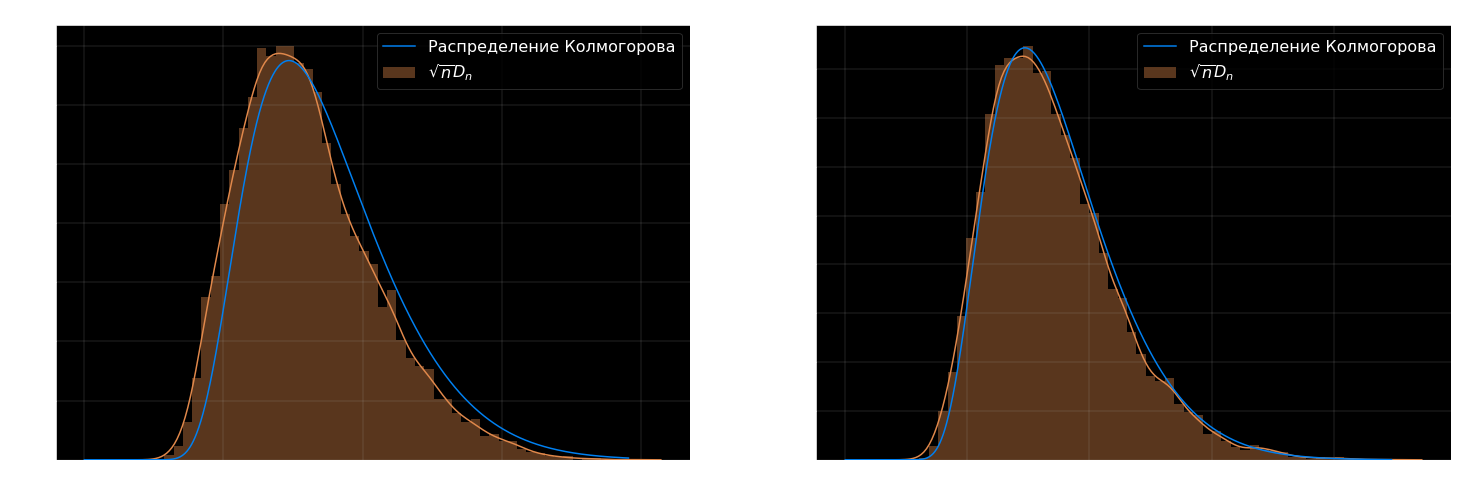

In [8]:
numpy.random.seed(8)
n_array = [5, 100]
distribution = expon()
exp_size = 10000


pyplot.figure(figsize=(25, 8))

# –î–ª—è —Ä–∞–∑–Ω—ã—Ö —Ä–∞–∑–º–µ—Ä–æ–≤ –≤—ã–±–æ—Ä–æ–∫ –ø–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏
for ind, n in tqdm(enumerate(n_array), total=len(n_array)):
    
    statistics = []
    # –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º exp_size —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤
    for i in tqdm(range(exp_size), leave=False):
        X = distribution.rvs(n)
        statistics.append(get_D_statistic(X, distribution.cdf) * numpy.sqrt(n))
    

    pyplot.subplot(1, 2, ind + 1)
    pyplot.title(f'–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞, N={n}', fontsize=16)
    distplot(statistics, label='$\sqrt{n}D_n$')
    x_array = numpy.linspace(0, numpy.max(statistics), 1000)
    pyplot.plot(x_array, kstwobign.pdf(x_array), label='–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞')
    pyplot.legend(fontsize=16)
    pyplot.grid(linewidth=0.2)
    pyplot.xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏', fontsize=16)
    pyplot.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å', fontsize=16)
pyplot.show()

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –¥–∞–∂–µ –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —Ç–æ, —á—Ç–æ –º–µ—Ç–æ–¥ –∞—Å–∏–º–ø—Ç–æ—Ç–∏—á–µ—Å–∫–∏–π, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç $\sqrt{n}D_n$ –¥–∞–∂–µ –ø—Ä–∏ –º–∞–ª—ã—Ö —Ä–∞–∑–º–µ—Ä–∞—Ö –≤—ã–±–æ—Ä–æ–∫. –ù–æ –µ—Å—Ç—å –Ω–µ–±–æ–ª—å—à–æ–π —Å–¥–≤–∏–≥ –≤ –±–æ–ª—å—à—É—é —Å—Ç–æ—Ä–æ–Ω—É, —á—Ç–æ —Ö–æ—Ä–æ—à–æ, —Ç–∞–∫ –∫–∞–∫ –∫—Ä–∏—Ç–µ—Ä–∏–π –±—É–¥–µ—Ç –æ—à–∏–±–∞—Ç—å—Å—è –º–µ–Ω—å—à–µ, —á–µ–º –≤ $\alpha$% —Å–ª—É—á–∞–µ–≤. –ù–æ –¥–ª—è –º–∞–ª—ã—Ö —Ä–∞–∑–º–µ—Ä–æ–≤ –≤—ã–±–æ—Ä–æ–∫ –±—ã–ª–∏ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏ –∏–∑–æ–±—Ä–µ—Ç–µ–Ω—ã –ø–æ–ø—Ä–∞–≤–∫–∏, —á—Ç–æ–±—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–ø–∏—Å—ã–≤–∞–ª–æ –∏ —ç—Ç–∏ —Å–ª—É—á–∞–∏.



–ö–∞–∫–æ–π –±—É–¥–µ—Ç –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å —É —ç—Ç–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è? –ú—ã –±—É–¥–µ–º –æ—Ç–≤–µ—Ä–≥–∞—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É —Ç–æ–ª—å–∫–æ –≤ —Å–ª—É—á–∞–µ, –µ—Å–ª–∏ $D_n$ –æ—á–µ–Ω—å –±–æ–ª—å—à–æ–µ. –ê –∑–Ω–∞—á–∏—Ç –Ω–∞—Å –∏–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç –ª–∏—à—å –ø—Ä–∞–≤–∞—è –æ–±–ª–∞—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞.

### –ö—Ä–∏—Ç–µ—Ä–∏–π –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞

$H_0: F=F_0\ vs.\ H_1: F \neq F_0$. **–í–∞–∂–Ω–æ –ø–æ–º–Ω–∏—Ç—å, —á—Ç–æ –∫—Ä–∏—Ç–µ—Ä–∏–π —Ä–∞–±–æ—Ç–∞–µ—Ç –¥–ª—è –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π!**
- –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ $D_n = \underset{x \in \mathbb{R}}{\sup} |\widehat{F_n}(x) - F_0(x)|$
- –ü—Ä–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–º —Ä–∞–∑–º–µ—Ä–µ –≤—ã–±–æ—Ä–∫–∏ $\sqrt{n} D_n \sim \phi$, –≥–¥–µ $\phi$ –∏–º–µ–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞ (–ø–æ —Ç–µ–æ—Ä–µ–º–µ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞)
- –∫—Ä–∏—Ç–µ—Ä–∏–π: $\left\{\sqrt{n} D_n \geq u_{1 - \alpha} \right\}$, –≥–¥–µ $u_{1 - \alpha}$ &mdash; $1 - \alpha$ –∫–≤–∞–Ω—Ç–∏–ª—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞
    - `p-value = 1 - kstwobign.cdf(d)`, –≥–¥–µ d &mdash; —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ $\sqrt{n}D(X)$, `kstwobign` &mdash; —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞.

**–ö—Ä–∏—Ç–µ—Ä–∏–π –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞ –µ—Å—Ç—å –≤ –±–∏–±–ª–∏–æ—Ç–µ–∫–µ stats**

- `scipy.stats.kstest` &mdash; [–±–∏–±–ª–∏–æ—Ç–µ–∫–∞](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) –¥–ª—è –∫—Ä–∏—Ç–µ—Ä–∏—è –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞, –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞.

–í –∫–∞—á–µ—Å—Ç–≤–µ cdf –º–æ–∂–Ω–æ —Å—Ç—Ä–æ–∫–æ–π —É–∫–∞–∑–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–∑ scipy.stats. –í —Ç–∞–∫–æ–º —Å–ª—É—á–∞–µ –∞—Ä–≥—É–º–µ–Ω—Ç—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–¥–∞—é—Ç—Å—è –Ω–∞ –≤—Ö–æ–¥ –æ—Ç–¥–µ–ª—å–Ω–æ —á–µ—Ä–µ–∑ args: 

In [9]:
sample = norm(0.10, 0.04).rvs(10)


Dn, p = kstest(rvs=sample, cdf='norm', args=(0.10, 0.04))
print(f'p-value: {p:.4f}')

p-value: 0.6972


–ú–æ–∂–Ω–æ —É–∫–∞–∑–∞—Ç—å cdf –≤ –≤–∏–¥–µ lambda-—Ñ—É–Ω–∫—Ü–∏–∏ –æ—Ç $x$:

In [10]:
Dn, p = kstest(rvs=sample, cdf=lambda x: norm.cdf(x, loc=0.10, scale=0.04))
print(f'p-value: {p:.4f}')

p-value: 0.6972


In [11]:
# –¥–ª—è –º–æ–¥–Ω–∏–∫–æ–≤
from typing import Callable

def norm_cdf_closure(loc: float, scale: float) -> Callable:
    """–ú–æ–∂–Ω–æ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ –Ω–∞–ø–∏—Å–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é"""
    def inner_norm_cdf(x):
        return norm.cdf(x=x, loc=loc, scale=scale)
    return inner_norm_cdf

# –≤–º–µ—Å—Ç–æ 'norm' –º–æ–∂–Ω–æ –≤ —è–≤–Ω–æ–º –≤–∏–¥–µ —É–∫–∞–∑–∞—Ç—å –ª—é–±—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
Dn, p = kstest(sample, norm_cdf_closure(loc=0.10, scale=0.04))
print(f'p-value: {p:.4f}')

p-value: 0.6972


–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –≤–Ω–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –≤–∞—Ä–∏–∞–Ω—Ç–∞ –ø—Ä–æ–≥—Ä–∞–º–º—ã, —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å–æ–≤–ø–∞–¥–∞–µ—Ç üòä 

### –ü—Ä–æ–≤–µ—Ä–∫–∞ –∫—Ä–∏—Ç–µ—Ä–∏—è

–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –ø—Ä–æ–≤–µ—Ä–∏–º —Å –ø–æ–º–æ—â—å—é –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ, –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ, –∞ –Ω–µ —Å –ø–æ–º–æ—â—å—é –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–π:

In [12]:
def check_kstest(dist, sample_size, N_exps=10000, to_print=True):
    """
        –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è FPR, –µ—Å–ª–∏ —Ñ–ª–∞–≥ to_print = False. –ò–Ω–∞—á–µ –ø–µ—á–∞—Ç–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç.
    
        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
            - dist: –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã–±–æ—Ä–∫–∏
            - sample_size: —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏
            - N_exps: —á–∏—Å–ª–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤, –ø–æ –∫–æ—Ç–æ—Ä—ã–º –ø–æ—Ç–æ–º —Å—á–∏—Ç–∞–µ—Ç—Å—è FPR
            - to_print: –ø–µ—á–∞—Ç–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∏–ª–∏ –Ω–µ—Ç. –ï—Å–ª–∏ –Ω–µ—Ç, —Ç–æ —Ñ—É–Ω–∫—Ü–∏—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–æ–≤. –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è FPR.
    """
    
    numpy.random.seed(35)
    bad_cnt=0
    alpha=0.05

    for i in tqdm(range(N_exps)):
        # –ì–µ–Ω–µ—Ä–∏—Ä—É—é –≤—ã–±–æ—Ä–∫—É
        sample = dist.rvs(sample_size)

        # –ó–∞–ø—É—Å–∫–∞—é –∫—Ä–∏—Ç–µ—Ä–∏–π –∏ —Å—á–∏—Ç–∞—é p-value
        pvalue = kstest(sample, cdf=dist.cdf).pvalue

        # –ü—Ä–æ–≤–µ—Ä—è—é, —á—Ç–æ pvalue < alpha
        bad_cnt += (pvalue < alpha)

    if to_print:
        print(f"FPR: {round(bad_cnt / N_exps, 4)}")
        print(f"CI={proportion_confint(count = bad_cnt, nobs = N_exps, alpha=0.05, method='wilson')}")
    else:
        return proportion_confint(count = bad_cnt, nobs = N_exps, alpha=0.05, method='wilson')

–ü—Ä–æ–≤–µ—Ä–∏–º –∫—Ä–∏—Ç–µ—Ä–∏–π –¥–ª—è —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:

In [13]:
check_kstest(expon(scale=10), sample_size=5, N_exps=10000, to_print=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

FPR: 0.0478
CI=(0.043789399861243195, 0.05215788826519671)


–ê —á—Ç–æ –±—É–¥–µ—Ç, –µ—Å–ª–∏ –º—ã –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –∫—Ä–∏—Ç–µ—Ä–∏–µ–º –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞ –¥–ª—è –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π?

In [14]:
check_kstest(randint(1, 7), sample_size=100, N_exps=10000, to_print=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

FPR: 1.0
CI=(0.9996160016293234, 1.0)


–û–Ω –≤—Å–µ–≥–¥–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç –≥–∏–ø–æ—Ç–µ–∑—É. –•–æ—Ç—è –æ–Ω–∞ –≤–µ—Ä–Ω–∞. **–ü–æ—ç—Ç–æ–º—É –Ω–µ —Å—Ç–æ–∏—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç–æ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π –¥–ª—è –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π!**

**–ò—Ç–æ–≥–æ, –º—ã –ù–ï —É–º–µ–µ–º —Ä–µ—à–∞—Ç—å –∑–∞–¥–∞—á—É –¥–ª—è –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π, –Ω–æ —É–º–µ–µ–º –¥–ª—è –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö!**

---

## –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å–ª–æ–∂–Ω—ã—Ö –≥–∏–ø–æ—Ç–µ–∑ –ø—Ä–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ


–í—Å–µ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ —Ä–∞—Å—Å—É–∂–¥–µ–Ω–∏—è –º—ã –≤–µ–ª–∏ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –ø—Ä–æ—Å—Ç–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã. –î–∞–≤–∞–π—Ç–µ —Ä–∞–∑–±–µ—Ä–µ–º—Å—è, –∫–∞–∫ –ø—Ä–æ–≤–µ—Ä—è—Ç—å —Å–ª–æ–∂–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—É, –Ω–æ –ø–æ–∫–∞ —Ç–æ–ª—å–∫–æ –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.


> üìà **–ó–∞–¥–∞—á–∞**
>
> –ú—ã –Ω–∞—à–ª–∏ –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ, —á—Ç–æ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ 2 –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö —Å–ª—É—á–∞–π–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω –∏–∑ —Ä–∞–∑–Ω—ã—Ö –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π &mdash; —ç—Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –≤ —Å–ª—É—á–∞–µ, –µ—Å–ª–∏ –∑–Ω–∞–º–µ–Ω–∞—Ç–µ–ª—å "–º–∞–ª–æ–≤–µ—Ä–æ—è—Ç–Ω–æ –±—É–¥–µ—Ç –±–ª–∏–∑ 0" ([—Å—Å—ã–ª–∫–∞](https://link.springer.com/article/10.1007/s00362-012-0429-2)). –ö–∞–∫ —ç—Ç–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ? 

**–ò–¥–µ—è**
- –ù–∞—Å–∏–º—É–ª–∏—Ä—É–µ–º –≤—ã–±–æ—Ä–∫—É –æ—Ç–Ω–æ—à–µ–Ω–∏–π –±–æ–ª—å—à–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞.
- –ù–∞ —ç—Ç–æ–π –≤—ã–±–æ—Ä–∫–µ –ø—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—É $H_0:$ –≤—ã–±–æ—Ä–∫–∞ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.
- –¢–∞–∫ –º—ã –ø—Ä–æ–≤–µ—Ä–∏–º —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏—è –Ω–∞ –∫–∞–∫–æ–º-—Ç–æ —Å–ª—É—á–∞–π–Ω–æ–º –ø—Ä–∏–º–µ—Ä–µ.


### –ö—Ä–∏—Ç–µ—Ä–∏–π –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Å–ª–æ–∂–Ω—ã—Ö –≥–∏–ø–æ—Ç–µ–∑ –ø—Ä–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ


–ù–æ –∫–∞–∫ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Å–ª–æ–∂–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—É? –ü–µ—Ä–≤–∞—è –∏–¥–µ—è: –¥–∞–≤–∞–π—Ç–µ –æ—Ü–µ–Ω–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã $\mu, \sigma^2$ –ø–æ –≤—ã–±–æ—Ä–∫–µ. –ü–æ—Ö–æ–∂–µ–µ –º—ã –¥–µ–ª–∞–ª–∏ –≤ t-test –∏ —Ç–∞–º —ç—Ç–æ —Å—Ä–∞–±–æ—Ç–∞–ª–æ.
- $\widehat{\mu} = \overline X$
- $\widehat{\sigma^2} =S^2 = \dfrac{1}{n - 1}\underset{i=1}{\overset{n}{\sum}}(X_i - \overline X)^2$

In [9]:
def estimated_params_kstest(sample):
    """–ü—Ä–∏–¥—É–º–∞–Ω–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π"""
    
    mu = numpy.mean(sample)
    sigma = numpy.std(sample, ddof=1)
    dist = norm(loc=mu, scale=sigma)
    return kstest(sample, cdf=dist.cdf).pvalue

–ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –∫—Ä–∏—Ç–µ—Ä–∏–π:

In [10]:
N = 1000
num = norm(loc=100, scale=10).rvs(N)
den = norm(loc= -1000, scale=25).rvs(N)

sample = num / den
estimated_params_kstest(sample)

0.7997544280263768

–ù–∞ –ø–µ—Ä–≤—ã–π –≤–∑–≥–ª—è–¥, –≤—Å–µ –≤—ã–≥–ª—è–¥–∏—Ç –Ω–µ–ø–ª–æ—Ö–æ, –Ω–æ —ç—Ç–æ –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏–µ –æ–±–º–∞–Ω—á–∏–≤–æ. –í–µ–¥—å –ø–æ-–Ω–∞—Å—Ç–æ—è—â–µ–º—É –∫—Ä–∏—Ç–µ—Ä–∏–∏ –ø—Ä–æ–≤–µ—Ä—è—é—Ç—Å—è —á–µ—Ä–µ–∑ –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ! –ò —Å–Ω–∞—á–∞–ª–∞ –Ω–∞ –ø—Ä–æ—Å—Ç–æ–º –ø—Ä–∏–º–µ—Ä–µ, –≥–¥–µ —Ç–æ—á–Ω–æ –≤–µ—Ä–Ω–∞ $H_0$.

In [11]:
def check_criterion(criterion, sample_size, N_exps=10000, to_print=True):
    """
        –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –ø—Ä–∏–¥—É–º–∞–Ω–Ω–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è FPR, –µ—Å–ª–∏ —Ñ–ª–∞–≥ to_print = False. –ò–Ω–∞—á–µ –ø–µ—á–∞—Ç–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç.
    """
    
    numpy.random.seed(42)
    bad_cnt=0
    alpha=0.05

    for i in tqdm(range(N_exps)):
        # –ì–µ–Ω–µ—Ä–∏—Ä—É—é –≤—ã–±–æ—Ä–∫—É
        sample = norm(loc=100, scale=10).rvs(sample_size)

        # –ó–∞–ø—É—Å–∫–∞—é –∫—Ä–∏—Ç–µ—Ä–∏–π –∏ —Å—á–∏—Ç–∞—é p-value
        pvalue = criterion(sample)

        # –ü—Ä–æ–≤–µ—Ä—è—é, —á—Ç–æ pvalue < alpha
        bad_cnt += (pvalue < alpha)

    if to_print:
        print(f"FPR: {round(bad_cnt / N_exps, 4)}")
        print(f"CI={proportion_confint(count = bad_cnt, nobs = N_exps, alpha=0.05, method='wilson')}")
    else:
        return proportion_confint(count = bad_cnt, nobs = N_exps, alpha=0.05, method='wilson')

In [18]:
check_criterion(estimated_params_kstest, sample_size=1000, N_exps=10000, to_print=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

FPR: 0.0
CI=(0.0, 0.0003839983706765959)


–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ª–æ–∂–Ω—ã—Ö —Å—Ä–∞–±–∞—Ç—ã–≤–∞–Ω–∏–π (FPR) —Ä–∞–≤–µ–Ω –Ω—É–ª—é. –ß—Ç–æ —ç—Ç–æ –∑–Ω–∞—á–∏—Ç –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ? **–ß—Ç–æ –≥–¥–µ-—Ç–æ –µ—Å—Ç—å –æ—à–∏–±–∫–∞!**
- –í –æ–±—â–µ–º —Å–ª—É—á–∞–µ, –µ—Å–ª–∏ –≤—ã –ø—Ä–∏–¥—É–º–∞–ª–∏ –∫—Ä–∏—Ç–µ—Ä–∏–π, –∏ –æ–Ω –¥–∞–µ—Ç FPR —Ä–∞–≤–Ω—ã–π 0, –∑–Ω–∞—á–∏—Ç —ç—Ç–æ –ø–ª–æ—Ö–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π! –ü–æ—á–µ–º—É? –ü–æ—Ç–æ–º—É —á—Ç–æ –æ–Ω –±—É–¥–µ—Ç –º–µ–Ω–µ–µ –º–æ—â–Ω—ã–º —á–µ–º –¥—Ä—É–≥–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π —Å —É—Ä–æ–≤–Ω–µ–º –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 5%!
    - –ó–Ω–∞—á–∏—Ç, –ø—Ä–∏–¥—É–º–∞–Ω–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π –ø–ª–æ—Ö!

–ú—ã –æ—Ü–µ–Ω–∏–ª–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ –Ω–∞—à–µ–π –≤—ã–±–æ—Ä–∫–µ, –∞ –ø–æ—Ç–æ–º –ø–æ–¥—Å—Ç–∞–≤–∏–ª–∏ –∏—Ö –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –í —ç—Ç–æ–º —Å–ª—É—á–∞–µ –ø—Ä–æ–∏–∑–æ—à–ª–æ "–ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ –ø–æ–¥ –¥–∞–Ω–Ω—ã–µ". –ù–∞—à–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –≤—Å–µ–≥–¥–∞ –±—ã–ª–∏ –ø–æ–¥–æ–±—Ä–∞–Ω—ã –∏–¥–µ–∞–ª—å–Ω–æ –¥–ª—è –ø–æ–ª—É—á–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏, —Ö–æ—Ç—è –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –æ–Ω–∏ –¥—Ä—É–≥–∏–µ!


In [12]:
sample = norm(loc=100, scale=10).rvs(1000)
mu = numpy.mean(sample)
sigma = numpy.std(sample, ddof=1)
mu, sigma

(100.24918964915919, 9.951902255273907)

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –æ–Ω–∏ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –∏—Å—Ç–∏–Ω–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è. –≠—Ç–∏ –æ—Ç–ª–∏—á–∏—è –∏ –¥–µ–ª–∞—é—Ç FPR –æ–∫–æ–ª–æ 0.

–î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã —Ä–µ—à–∏—Ç—å —ç—Ç—É –ø—Ä–æ–±–ª–µ–º—É —É—á–µ–Ω—ã–µ  –Ω–∞—Å–µ–º–ø–ª–∏—Ä–æ–≤–∞–ª–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É $D_n$ –∏ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ –ø–æ—Å—Ç—Ä–æ–∏–ª–∏ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–µ –æ–±–ª–∞—Å—Ç–∏ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö $\alpha$ –¥–ª—è —ç—Ç–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏.
–ò –Ω–∞–∑–≤–∞–ª–∏ –Ω–æ–≤—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π **–∫—Ä–∏—Ç–µ—Ä–∏–µ–º  –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞ —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π –õ–∏–ª–ª–∏–µ—Ñ–æ—Ä—Å–∞**.


#### –ö—Ä–∏—Ç–µ—Ä–∏–π –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞ —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π –õ–∏–ª–ª–∏–µ—Ñ–æ—Ä—Å–∞ –≤ –±–∏–±–ª–∏–æ—Ç–µ–∫–µ statsmodels
 [statsmodels.stats.diagnostic.lilliefors](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.lilliefors.html) ‚Äî –ö—Ä–∏—Ç–µ—Ä–∏–π –õ–∏–ª–ª–∏–µ—Ñ–æ—Ä—Å–∞. 

In [13]:
Dn, p = lilliefors(sample, dist='norm', pvalmethod='table') 
print(f"Kolmogorov-Lilliefors' Dn statistic: {Dn:.4f},\np-value: {p:.4f}")

Kolmogorov-Lilliefors' Dn statistic: 0.0148,
p-value: 0.9103


–ü—Ä–æ–≤–µ—Ä–∏–º –∫—Ä–∏—Ç–µ—Ä–∏–π —á–µ—Ä–µ–∑ –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ:

In [14]:
lilliefors_crierion = lambda sample: lilliefors(sample, dist='norm')[1]
check_criterion(lilliefors_crierion, sample_size=1000, N_exps=10000, to_print=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

FPR: 0.0384
CI=(0.0348075417687003, 0.04234696552710831)


FPR –≤—Å–µ —Ç–∞–∫–∂–µ –∑–∞–Ω–∏–∂–µ–Ω, –Ω–æ –æ–Ω —Å–∏–ª—å–Ω–æ –±–æ–ª—å—à–µ, —á–µ–º —É –ø—Ä–∏–¥—É–º–∞–Ω–Ω–æ–≥–æ –Ω–∞–º–∏ —Ä–∞–Ω–µ–µ –∫—Ä–∏—Ç–µ—Ä–∏—è. –ü–æ—ç—Ç–æ–º—É –æ–Ω –º–æ—â–Ω–µ–µ, –∞ –∑–Ω–∞—á–∏—Ç –∏ –ª—É—á—à–µ!

–ü—Ä–æ–≤–µ—Ä–∏–º —Ç–µ–ø–µ—Ä—å: –ø—Ä–∞–≤–¥–∞ –ª–∏, —á—Ç–æ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ?

In [15]:
N = 1000
num = norm(loc=100, scale=10).rvs(N)
den = norm(loc= -1000, scale=25).rvs(N)

sample = num / den
Dn, p = lilliefors(sample, dist='norm', pvalmethod='table') 
print(f"Kolmogorov-Lilliefors' Dn statistic: {Dn:.4f},\np-value: {p:.4f}")

Kolmogorov-Lilliefors' Dn statistic: 0.0157,
p-value: 0.8520


–î–∞, —Ç–∞–∫ –æ–Ω–æ –∏ –µ—Å—Ç—å! –ê –µ—Å–ª–∏ –±—ã –∑–Ω–∞–º–µ–Ω–∞—Ç–µ–ª—å –±—ã–ª –±–ª–∏–∑–æ–∫ –∫ 0?

In [16]:
N = 1000
num = norm(loc=100, scale=10).rvs(N)
den = norm(loc= -10, scale=25).rvs(N)

sample = num / den
Dn, p = lilliefors(sample, dist='norm', pvalmethod='table') 
print(f"Kolmogorov-Lilliefors' Dn statistic: {Dn:.4f},\np-value: {p:.4f}")

Kolmogorov-Lilliefors' Dn statistic: 0.3789,
p-value: 0.0010


–í —ç—Ç–æ–º —Å–ª—É—á–∞–µ –≤—ã–±–æ—Ä–∫–∞ –Ω–µ –∏–∑ –Ω–æ–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è!

–ò—Ç–æ–≥–æ, –º—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–ª–∏ –ø–µ—Ä–≤—ã–π –º–µ—Ç–æ–¥, –∞ –∏–º–µ–Ω–Ω–æ –ö—Ä–∏—Ç–µ—Ä–∏–π –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞ —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π –õ–∏–ª–ª–∏–µ—Ñ–æ—Ä—Å–∞.

----

### –ö—Ä–∏—Ç–µ—Ä–∏–π –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞

–¢–∞–∫–∂–µ —è–≤–ª—è–µ—Ç—Å—è –∫—Ä–∏—Ç–µ—Ä–∏–µ–º —Å–æ–≥–ª–∞—Å–∏—è –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –ò —Ç–∞–∫–∂–µ, –∫–∞–∫ –∫—Ä–∏—Ç–µ—Ä–∏–π –õ–∏–ª–ª–∏–µ—Ñ–æ—Ä—Å–∞, –æ–Ω –ø—Ä–æ–≤–µ—Ä—è–µ—Ç —Å–ª–æ–∂–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—É (–∫–æ–≥–¥–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–µ –æ—Ü–µ–Ω–µ–Ω—ã).
–£ –Ω–µ–≥–æ –ª–æ–≥–∏–∫–∞ —Ç–∞–∫–∞—è –∂–µ, –∫–∞–∫ –∏ –≤ –ø—Ä–µ–¥—ã–¥—É—â–µ–º —Å–ª—É—á–∞–µ: —É—á–µ–Ω—ã–µ –ø—Ä–∏–¥—É–º–∞–ª–∏ –Ω–µ–∫—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –∏ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ –æ—Ü–µ–Ω–∏–ª–∏ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–µ –æ–±–ª–∞—Å—Ç–∏ –¥–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ø—Ä–∏ —Ä–∞–∑–Ω—ã—Ö $\alpha$.


- `scipy.stats.shapiro` &mdash; [—Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è –≤ Python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

–ü—Ä–æ–≤–µ—Ä–∏–º –∫—Ä–∏—Ç–µ—Ä–∏–π:

In [24]:
shapiro_criterion = lambda sample: shapiro(sample).pvalue
check_criterion(shapiro_criterion, sample_size=1000, N_exps=10000, to_print=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

FPR: 0.0523
CI=(0.04810587403933279, 0.05683795810177102)


FPR —É –Ω–µ–≥–æ –±–æ–ª–µ–µ —Ç–æ—á–Ω—ã–π, —á–µ–º —É –∫—Ä–∏—Ç–µ—Ä–∏—è –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞.

–¢–µ–ø–µ—Ä—å –∂–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–π –º–µ—Ç–æ–¥ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é: Q‚ÄìQ plot. –≠—Ç–æ –±—É–¥–µ—Ç –Ω–µ –∫—Ä–∏—Ç–µ—Ä–∏–π, –∞ –∏–º–µ–Ω–Ω–æ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è.

---

### Q‚ÄìQ plot


–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ —É –Ω–∞—Å –µ—Å—Ç—å –¥–≤–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $\mathcal{N}(\mu, \sigma^2)$ –∏ $\mathcal{N}(\mu', \sigma'^2)$. 

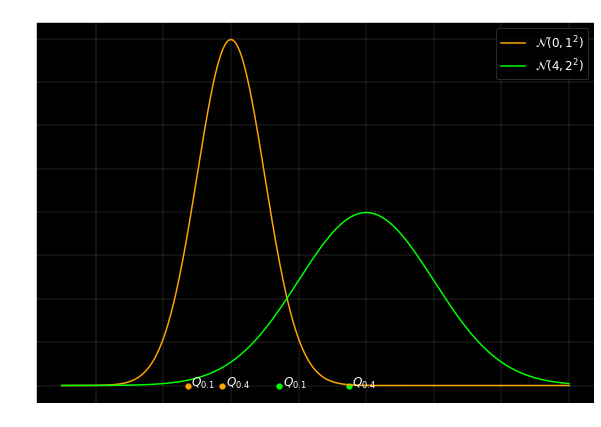

In [27]:
x = numpy.linspace(-5, 10, 1000)
dist_params = {
    "1": (0, 1),
    "2": (4, 2)
}
colors = {
    "1": 'orange',
    "2": 'lime'
}
quantiles = {
    "1": [0.1, 0.4],
    "2": [0.1, 0.4],
}

pyplot.figure(figsize=(10, 7))
pyplot.title('–ì—Ä–∞—Ñ–∏–∫ –¥–≤—É—Ö –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π', fontsize=12)
for index in dist_params:
    params = dist_params[index]
    mu, sigma = params
    color = colors[index]
    q_array = quantiles[index]
    distr = norm(mu, sigma)
    pyplot.plot(x, distr.pdf(x), label='$\mathcal{N}$' + f'$({mu}, {sigma}^2)$', color=color)
    for q in q_array:
        dot_x = distr.ppf(q)
        pyplot.scatter(dot_x, 0, linewidth=0.2, color=color)
        pyplot.text(dot_x + 0.1, 0, "$Q_{" + str(q) + "}$", fontsize=12) 

pyplot.legend(fontsize=12)
pyplot.grid(linewidth=0.2)
pyplot.show()

–ü—É—Å—Ç—å $\alpha, \beta$ &mdash; —Ä–∞–∑–Ω—ã–µ –∫–≤–∞–Ω—Ç–∏–ª–∏. –û–±–æ–∑–Ω–∞—á–∏–º —á–µ—Ä–µ–∑ $Q_{\alpha}$ –∫–≤–∞–Ω—Ç–∏–ª–∏ —Ä—ã–∂–µ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞, –∏ $Q'_{\alpha}$ –∫–≤–∞–Ω—Ç–∏–ª–∏ –∑–µ–ª–µ–Ω–æ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞.
–î–æ–∫–∞–∂–µ–º, —á—Ç–æ $$\frac {Q_{\beta}-Q_{\alpha}}{Q'_{\beta}-Q'_{\alpha}} =\frac{\sigma}{\sigma'}, i=1, 2,..., 9 $$

> –ù–∞–ø–æ–º–Ω–∏–º –ø–∞—Ä—É –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–∞ —Å–≤–æ–π—Å—Ç–≤ –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:
> $\xi_1 \sim \mathcal{N}(\mu_1, \sigma_1^2),\ \xi_2 \sim \mathcal{N}(\mu_2, \sigma_2^2) \Rightarrow \xi_1 + \xi_2 \sim \mathcal{N}(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)$
>
> $a \xi_1 \sim \mathcal{N}(a\mu_1, a^2\sigma_1^2)$,
>
> $a + \xi_1 \sim \mathcal{N}(a + \mu_1, \sigma_1^2)$.

–ò—Å–ø–æ–ª—å–∑—É—è —Å–≤–æ–π—Å—Ç–≤–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, —É–∫–∞–∑–∞–Ω–Ω—ã–µ –≤—ã—à–µ:

- $\mathcal{N}(\mu,\sigma^2).ppf(\alpha) \cdot b + a = \mathcal{N}(\mu \cdot b +a, b^2 \cdot \sigma^2).ppf(\alpha)$. –≠—Ç–æ —Ç–∞–∫–∂–µ –≤–∏–¥–Ω–æ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ


–ü—É—Å—Ç—å 
- $\sigma' =\sigma \cdot b,$ –∞ $\mu' = \mu \cdot b + a$. 
- –¢–æ–≥–¥–∞ $b=\frac{\sigma'}{\sigma}$, –∏ $a=\mu'- \mu \cdot \frac{\sigma'}{\sigma}$.
- –ü—Ä–æ–¥–æ–ª–∂–∏–º –Ω–∞—à–µ —Ä–∞–≤–µ–Ω—Å—Ç–≤–æ: $\mathcal{N}(\mu \cdot b +a, b^2 \cdot \sigma^2).ppf(\alpha) = \mathcal{N}(\mu', \sigma'^2).ppf(\alpha)$ 


–ò–∑ —ç—Ç–æ–≥–æ —Å–ª–µ–¥—É–µ—Ç, —á—Ç–æ :
1. $Q_{\alpha}\cdot b +a = Q'_{\alpha}$
2. $Q_{\beta}\cdot b +a = Q'_{\beta}$

–í—ã—á—Ç–µ–º –∏–∑ –ø–µ—Ä–≤–æ–≥–æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–∞ –≤—Ç–æ—Ä–æ–µ –∏ –ø–æ–ª—É—á–∏–º:

1. $Q_{\beta} \cdot b + a  - (Q_{\alpha}\cdot b + a) = Q'_{\beta} - Q'_{\alpha}$

2. $Q_{\beta}\cdot b  - Q_{\alpha}\cdot b  = Q'_{\beta} - Q'_{\alpha} $

3. $ b \cdot(Q_{\beta}  - Q_{\alpha})  = Q'_{\beta} - Q'_{\alpha}$

4. $\frac{Q'_{\beta} - Q'_{\alpha}}{Q_{\beta}  - Q_{\alpha}} = b $, –∞ —Ç.–∫.  $b=\frac{\sigma'}{\sigma}$

5. $\frac{Q'_{\beta} - Q'_{\alpha}}{Q_{\beta}  - Q_{\alpha}}  = \frac{\sigma'}{\sigma} $ —á.—Ç.–¥

–ò—Ç–∞–∫, –ø–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ –µ—Å–ª–∏ —Ä–∞–∑–Ω–æ—Å—Ç—å —Å–æ—Å–µ–¥–Ω–∏—Ö –∫–≤–∞–Ω—Ç–∏–ª–µ–π –æ–¥–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–¥–µ–ª–∏—Ç—å –Ω–∞ —Ä–∞–∑–Ω–æ—Å—Ç—å —Ç–∞–∫–∏—Ö –∂–µ —Å–æ—Å–µ–¥–Ω–∏—Ö –∫–≤–∞–Ω—Ç–∏–ª–µ–π –¥—Ä—É–≥–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (–æ–¥–Ω–æ –ø–æ–ª—É—á–∞–µ—Ç—Å—è –∏–∑ –¥—Ä—É–≥–æ–≥–æ –ª–∏–Ω–µ–π–Ω—ã–º –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º), —Ç–æ —ç—Ç–æ –≤—Å–µ–≥–¥–∞ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–∞. –î–ª—è —á–µ–≥–æ –∂–µ —ç—Ç–æ –º–æ–∂–µ—Ç –Ω–∞–º –ø–æ–Ω–∞–¥–æ–±–∏—Ç—å—Å—è? –ò —Ç—É—Ç –º—ã –ø–µ—Ä–µ—Ö–æ–¥–∏–º –∫ Q-Q Plot.

### –ü–æ—Å—Ç–∞–Ω–æ–≤–∫–∞ –∑–∞–¥–∞—á–∏ QQ-plot

QQ-plot &mdash; –º–µ—Ç–æ–¥, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∑–≤–æ–ª—è–µ—Ç –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å "–Ω–∞—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–æ" –¥–∞–Ω–Ω—ã–µ –æ–ø–∏—Å—ã–≤–∞—é—Ç—Å—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º. –í –æ—Ç–ª–∏—á–∏–µ –æ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ —ç—Ç–æ—Ç –º–µ—Ç–æ–¥ –Ω–µ –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ –æ–Ω –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç –∏–ª–∏ –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö, –Ω–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –≤–∏–∑—É–∞–ª—å–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –Ω–∞—Å–∫–æ–ª—å–∫–æ –¥–∞–Ω–Ω—ã–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã! –£–º–µ—Ç—å –≥—Ä–∞–º–æ—Ç–Ω–æ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ &mdash; –æ–¥–Ω–∞ –∏–∑ –æ—Å–Ω–æ–≤–Ω—ã—Ö –∑–∞–¥–∞—á –∞–Ω–∞–ª–∏—Ç–∏–∫–∞, –∏ QQ-–ø–ª–æ—Ç —ç—Ç–æ –ª—É—á—à–∏–π –º–µ—Ç–æ–¥ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö.


**–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è QQ-–ø–ª–æ—Ç**
- –ü—É—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã–±–æ—Ä–∫–∏ &mdash; $\mathcal{N}(\mu, \sigma^2)$.
- –ù–∞–π–¥–µ–º –∫–≤–∞–Ω—Ç–∏–ª–∏ 2 —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π: $\mathcal{N}(\mu, \sigma^2)$ –∏ $\mathcal{N}(0, 1)$. –ò—Ö –∫–≤–∞–Ω—Ç–∏–ª–∏ –±—É–¥—É—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ $Q, Q'$.
- –û—Ç–ª–æ–∂–∏–º –∫–≤–∞–Ω—Ç–∏–ª–∏ –ø–µ—Ä–≤–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ –æ—Å–∏ Y, –∞ –≤—Ç–æ—Ä–æ–≥–æ - –ø–æ –æ—Å–∏ X.
- –¢–æ–≥–¥–∞ –≤—ã–≤–µ–¥–µ–Ω–Ω–æ–µ –≤—ã—à–µ –ø—Ä–∞–≤–∏–ª–æ —É—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç, —á—Ç–æ –≤—Å–µ —Ç–æ—á–∫–∏ $(Q'_{\alpha}, Q_{\alpha})$ –ª–µ–∂–∞—Ç –Ω–∞ –æ–¥–Ω–æ–π –ø—Ä—è–º–æ–π.
    -  –¢–∞–Ω–≥–µ–Ω—Å —É–≥–ª–∞ –Ω–∞–∫–ª–æ–Ω–∞ —ç—Ç–æ–π –ø—Ä—è–º–æ–π –≤—Å–µ–≥–¥–∞ –æ–¥–∏–Ω –∏ —Ç–æ—Ç –∂–µ –∏ —Ä–∞–≤–µ–Ω $\frac{\sigma'}{\sigma}$. 
    
    
–î–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ —É–≥–ª–∞ –Ω–∞–∫–ª–æ–Ω–∞ –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è [—Ñ—É–Ω–∫—Ü–∏–µ–π –∏–∑ matplotlib](https://matplotlib.org/stable/gallery/text_labels_and_annotations/angle_annotation.html).

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.transforms import IdentityTransform, TransformedBbox, Bbox


class AngleAnnotation(Arc):
    """
    Draws an arc between two vectors which appears circular in display space.
    """
    def __init__(self, xy, p1, p2, size=75, unit="points", ax=None,
                 text="", textposition="inside", text_kw=None, **kwargs):
        """
        Parameters
        ----------
        xy, p1, p2 : tuple or array of two floats
            Center position and two points. Angle annotation is drawn between
            the two vectors connecting *p1* and *p2* with *xy*, respectively.
            Units are data coordinates.

        size : float
            Diameter of the angle annotation in units specified by *unit*.

        unit : str
            One of the following strings to specify the unit of *size*:

            * "pixels": pixels
            * "points": points, use points instead of pixels to not have a
              dependence on the DPI
            * "axes width", "axes height": relative units of Axes width, height
            * "axes min", "axes max": minimum or maximum of relative Axes
              width, height

        ax : `matplotlib.axes.Axes`
            The Axes to add the angle annotation to.

        text : str
            The text to mark the angle with.

        textposition : {"inside", "outside", "edge"}
            Whether to show the text in- or outside the arc. "edge" can be used
            for custom positions anchored at the arc's edge.

        text_kw : dict
            Dictionary of arguments passed to the Annotation.

        **kwargs
            Further parameters are passed to `matplotlib.patches.Arc`. Use this
            to specify, color, linewidth etc. of the arc.

        """
        self.ax = ax or plt.gca()
        self._xydata = xy  # in data coordinates
        self.vec1 = p1
        self.vec2 = p2
        self.size = size
        self.unit = unit
        self.textposition = textposition

        super().__init__(self._xydata, size, size, angle=0.0,
                         theta1=self.theta1, theta2=self.theta2, **kwargs)

        self.set_transform(IdentityTransform())
        self.ax.add_patch(self)

        self.kw = dict(ha="center", va="center",
                       xycoords=IdentityTransform(),
                       xytext=(0, 0), textcoords="offset points",
                       annotation_clip=True)
        self.kw.update(text_kw or {})
        self.text = ax.annotate(text, xy=self._center, **self.kw)

    def get_size(self):
        factor = 1.
        if self.unit == "points":
            factor = self.ax.figure.dpi / 72.
        elif self.unit[:4] == "axes":
            b = TransformedBbox(Bbox.unit(), self.ax.transAxes)
            dic = {"max": max(b.width, b.height),
                   "min": min(b.width, b.height),
                   "width": b.width, "height": b.height}
            factor = dic[self.unit[5:]]
        return self.size * factor

    def set_size(self, size):
        self.size = size

    def get_center_in_pixels(self):
        """return center in pixels"""
        return self.ax.transData.transform(self._xydata)

    def set_center(self, xy):
        """set center in data coordinates"""
        self._xydata = xy

    def get_theta(self, vec):
        vec_in_pixels = self.ax.transData.transform(vec) - self._center
        return np.rad2deg(np.arctan2(vec_in_pixels[1], vec_in_pixels[0]))

    def get_theta1(self):
        return self.get_theta(self.vec1)

    def get_theta2(self):
        return self.get_theta(self.vec2)

    def set_theta(self, angle):
        pass

    # Redefine attributes of the Arc to always give values in pixel space
    _center = property(get_center_in_pixels, set_center)
    theta1 = property(get_theta1, set_theta)
    theta2 = property(get_theta2, set_theta)
    width = property(get_size, set_size)
    height = property(get_size, set_size)

    # The following two methods are needed to update the text position.
    def draw(self, renderer):
        self.update_text()
        super().draw(renderer)

    def update_text(self):
        c = self._center
        s = self.get_size()
        angle_span = (self.theta2 - self.theta1) % 360
        angle = np.deg2rad(self.theta1 + angle_span / 2)
        r = s / 2
        if self.textposition == "inside":
            r = s / np.interp(angle_span, [60, 90, 135, 180],
                                          [3.3, 3.5, 3.8, 4])
        self.text.xy = c + r * np.array([np.cos(angle), np.sin(angle)])
        if self.textposition == "outside":
            def R90(a, r, w, h):
                if a < np.arctan(h/2/(r+w/2)):
                    return np.sqrt((r+w/2)**2 + (np.tan(a)*(r+w/2))**2)
                else:
                    c = np.sqrt((w/2)**2+(h/2)**2)
                    T = np.arcsin(c * np.cos(np.pi/2 - a + np.arcsin(h/2/c))/r)
                    xy = r * np.array([np.cos(a + T), np.sin(a + T)])
                    xy += np.array([w/2, h/2])
                    return np.sqrt(np.sum(xy**2))

            def R(a, r, w, h):
                aa = (a % (np.pi/4))*((a % (np.pi/2)) <= np.pi/4) + \
                     (np.pi/4 - (a % (np.pi/4)))*((a % (np.pi/2)) >= np.pi/4)
                return R90(aa, r, *[w, h][::int(np.sign(np.cos(2*a)))])

            bbox = self.text.get_window_extent()
            X = R(angle, r, bbox.width, bbox.height)
            trans = self.ax.figure.dpi_scale_trans.inverted()
            offs = trans.transform(((X-s/2), 0))[0] * 72
            self.text.set_position([offs*np.cos(angle), offs*np.sin(angle)])


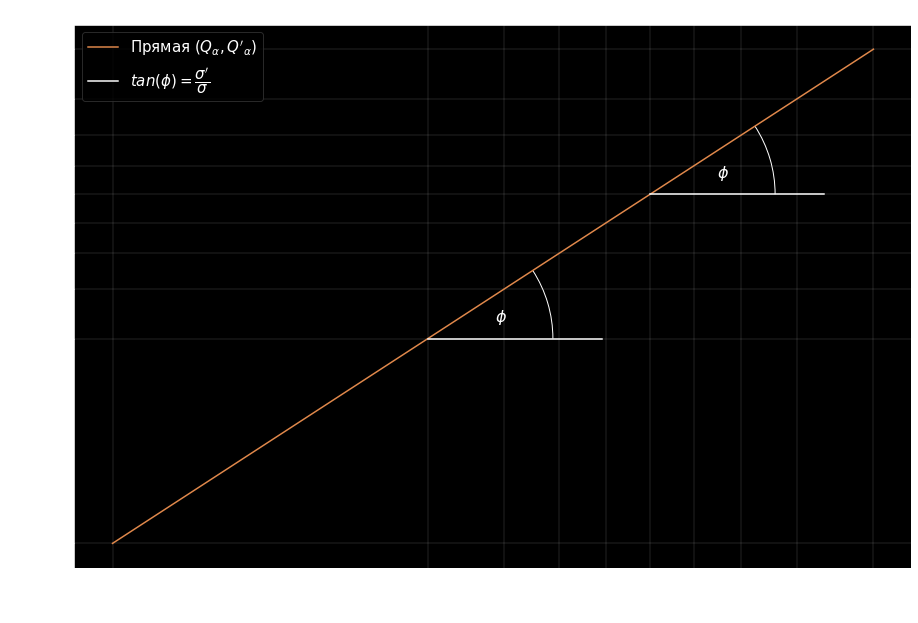

In [29]:
mu = 5
sigma = 10
sample_distr = norm(loc=mu, scale=sigma)
standart_distr = norm(loc=0, scale=1)
quantiles = np.arange(0.001, 1, 0.1)
quantle_xticks = ["$Q_{" + str(round(x, 2)) + "}$" for x in quantiles]
quantle_yticks = ["$Q'_{" + str(round(x, 2)) + "}$" for x in quantiles]
standart_q = standart_distr.ppf(quantiles)
sample_q = sample_distr.ppf(quantiles)


fig = pyplot.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
pyplot.title('QQ-Plot, –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –Ω–∞ –∏–¥–µ–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö', fontsize=15)


ax.plot(standart_q, sample_q, label="–ü—Ä—è–º–∞—è $(Q_{\\alpha}, Q'_{\\alpha})$")
for index in [1, 5]:
    center = (standart_q[index], sample_q[index])
    dot1 = (standart_q[index] + 1, sample_q[index])
    dot2 = (standart_q[index + 1], sample_q[index + 1])
    
    label=""
    if index == 1:
        label="$tan(\phi) = \dfrac{\sigma'}{\sigma}$"
    am1 = AngleAnnotation(center, dot1, dot2, ax=ax, size=250, text=r"$\phi$", text_kw=dict(fontsize=16))
    ax.plot(*zip(*[center, dot1]), color='white', label=label)


pyplot.ylabel("–ö–≤–∞–Ω—Ç–∏–ª–∏ $\mathcal{N}(\mu, \sigma^2)$", fontsize=15)
pyplot.xlabel("–ö–≤–∞–Ω—Ç–∏–ª–∏ $\mathcal{N}(0, 1)$", fontsize=15)
pyplot.xticks(standart_q, quantle_xticks, fontsize=15)
pyplot.yticks(sample_q, quantle_yticks, fontsize=15)
pyplot.legend(fontsize=15)
pyplot.grid(linewidth=0.2)
pyplot.show()

–ï—Å–ª–∏ –æ—Ç–ª–æ–∂–∏—Ç—å –≤—Å–µ –æ—Ç—Ä–µ–∑–∫–∏ —Å –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ $(Q_{0.i},Q'_{0.i});(Q_{0.i+0.1},Q'_{0.i+0.1})$, —Ç–æ –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –≤–æ –≤—Å–µ—Ö —Å–ª—É—á–∞—è—Ö —É–≥–æ–ª $\phi_i$ –±—É–¥–µ—Ç –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º.  –î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —á–µ–º—É –∂–µ —Ä–∞–≤–µ–Ω —É–≥–æ–ª $\phi_i$.

$$\begin{align}
   \phi_i = arctg \left({\frac {Q'_{0.i+0.1}-Q'_{0.i}}{Q_{0.i+0.1}-Q_{0.i}}}\right) = arctg \left({\frac{\sigma'}{\sigma}}\right) = arctg(b) 
\end{align}
$$

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥: –µ—Å–ª–∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫ –∫–≤–∞–Ω—Ç–∏–ª–µ–π –¥–≤—É—Ö –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π, —Ç–æ —ç—Ç–æ –±—É–¥–µ—Ç –ø—Ä—è–º–∞—è. –≠—Ç–æ –∏ –±—É–¥–µ—Ç Q-Q –ø–ª–æ—Ç.

>–ó–∞–º–µ—á–∞–Ω–∏–µ! –ù–µ–æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ —Ç–æ–ª—å–∫–æ –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π Q‚ÄìQ plot –±—É–¥–µ—Ç –ø—Ä—è–º–æ–π. –î–ª—è –≤—Å–µ—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –ø–µ—Ä–µ–≤–æ–¥—è—Ç—Å—è –¥—Ä—É–≥ –≤ –¥—Ä—É–≥–∞ –ª–∏–Ω–µ–π–Ω—ã–º–∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è–º–∏, –≥—Ä–∞—Ñ–∏–∫–æ–º Q‚ÄìQ plot –±—É–¥–µ—Ç –ø—Ä—è–º–∞—è.

----

–¢–µ–ø–µ—Ä—å –¥–∞–≤–π—Ç–µ –ø–æ—Å—Ç—Ä–æ–∏–º –Ω–∞—Å—Ç–æ—è—â–∏–π –≥—Ä–∞—Ñ–∏–∫ QQ-plot –¥–ª—è –≤—ã–±–æ—Ä–∫–∏. –î–ª—è —ç—Ç–æ–≥–æ —Å–¥–µ–ª–∞–µ–º –≤—Å–µ —Ç–æ –∂–µ —Å–∞–º–æ–µ, —á—Ç–æ –∏ –¥–µ–ª–∞–ª–∏ –≤—ã—à–µ, —Ç–æ–ª—å–∫–æ –∫–≤–∞–Ω—Ç–∏–ª–∏ –ø–æ–ª—É—á–∏–º –ø–æ –≤—ã–±–æ—Ä–∫–µ.

- –ü—É—Å—Ç—å —É –Ω–∞—Å N —Ç–æ—á–µ–∫ –≤ –≤—ã–±–æ—Ä–∫–µ.
- –¢–æ–≥–¥–∞ –æ—Ü–µ–Ω–∫–∞ i-–æ–π –∫–≤–∞–Ω—Ç–∏–ª–∏ &mdash; i –∑–Ω–∞—á–µ–Ω–∏–µ –≤ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ (–≤—Å–ø–æ–º–∏–Ω–∞–µ–º —ç–º–ø–∏—Ä–∏—á–µ—Å–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏–∑ 1 —á–∞—Å—Ç–∏). $\widehat{F_n}(x) = \dfrac{1}{N}\sum([X_i \leq x])$.
- –ü–æ—Å—Ç—Ä–æ–∏–º –∫–≤–∞–Ω—Ç–∏–ª–∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.
    - –î–ª—è —ç—Ç–æ–≥–æ –ø–æ—Å—á–∏—Ç–∞–µ–º –∫–≤–∞–Ω—Ç–∏–ª—å –≤ –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–µ $\dfrac{i}{N},\ i \in \{1, ...\ N - 1\}$
- –û—Ç–ª–æ–∂–∏–º –æ—Ü–µ–Ω–∫–∏ –∫–≤–∞–Ω—Ç–∏–ª–µ–π –ø–µ—Ä–≤–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ –æ—Å–∏ Y, –∞ –∏—Å—Ç–∏–Ω–Ω—ã–µ –∫–≤–∞–Ω—Ç–∏–ª–∏ –≤—Ç–æ—Ä–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è - –ø–æ –æ—Å–∏ X.
- –ï—Å–ª–∏ –≥—Ä–∞—Ñ–∏–∫ –Ω–∞–ø–æ–º–∏–Ω–∞–µ—Ç –ø—Ä—è–º—É—é, –∑–Ω–∞—á–∏—Ç —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ —ç—Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.



In [30]:
def my_qq_plot(sample):
    """
        –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏ QQ-Plot.
    """
    
    # –°—Ç—Ä–æ–∏–º –æ—Ü–µ–Ω–∫—É –∫–≤–∞–Ω—Ç–∏–ª–µ–π
    # –°–æ—Ä—Ç–∏—Ä—É–µ–º –≤—ã–±–æ—Ä–∫—É
    sample.sort()
    # –°–∞–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è –∏ –µ—Å—Ç—å –æ—Ü–µ–Ω–∫–∏ –∫–≤–∞–Ω—Ç–∏–ª–∏
    sample_quantiles = sample[1:-1]
    N = len(sample)

    # –°—á–∏—Ç–∞–µ–º N-2 —Ç–æ—á–∫–∏ –∫–≤–∞–Ω—Ç–∏–ª–µ–π —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (–±–µ–∑ +- –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç–∏)
    x = [i / N for i in range(1, N - 1)]
    theoretical_quantiles = norm().ppf(x)
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
    fig = pyplot.figure(figsize=(15, 10))
    ax = fig.add_subplot(1,1,1)

    ax.plot(theoretical_quantiles, sample_quantiles, 'k.', linewidth=1.0, color = 'green')

    ax.set_xlabel('theoretical quantiles', fontsize=15)
    ax.set_ylabel('sample quantiles', fontsize=15)
    ax.set_title('QQ-Plot –¥–ª—è –≤—ã–±–æ—Ä–∫–∏ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è', fontsize=15)
    pyplot.grid(linewidth=0.2)
    pyplot.show()

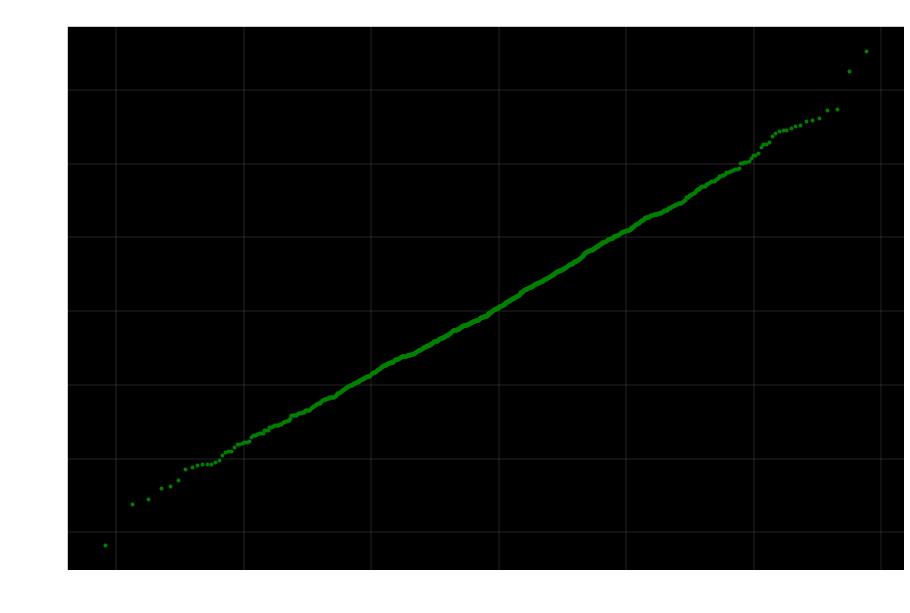

In [31]:
numpy.random.seed(102)
sample = norm(loc=100, scale=1000).rvs(size=1000)
my_qq_plot(sample)

–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –Ω–∞—à –≥—Ä–∞—Ñ–∏–∫ –æ—á–µ–Ω—å –Ω–∞–ø–æ–º–∏–Ω–∞–µ—Ç –ø—Ä—è–º—É—é. –ö–æ–Ω–µ—á–Ω–æ, –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –º—ã –≤–∑—è–ª–∏ –Ω–µ —Å–æ–≤—Å–µ–º –∫–≤–∞–Ω—Ç–∏–ª–∏, –∞ –≤—ã–±–æ—Ä–æ—á–Ω—ã–µ –∫–≤–∞–Ω—Ç–∏–ª–∏, –Ω–æ —Ç–µ–º –Ω–µ –º–µ–Ω–µ–µ, –ª–∏–Ω–µ–π–Ω–æ—Å—Ç—å –¥–æ–≤–æ–ª—å–Ω–æ —á–µ—Ç–∫–æ –ø—Ä–æ—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è.

-----

–î–∞–≤–∞–π—Ç–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å–ª–µ–¥—É—é—â–∏–π –ø—Ä–∏–º–µ—Ä. 

–î–æ–ø—É—Å—Ç–∏–º, –º—ã –∑–∞—Ö–æ—Ç–µ–ª–∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≥—Ä—É–∑–∫–∏ –Ω–∞—à–µ–≥–æ —Å–∞–π—Ç–∞ –≤ —Å–µ–∫—É–Ω–¥–∞—Ö. –ú—ã –≤–∑—è–ª–∏ –≤ –Ω–∞—à–∏—Ö –ª–æ–≥–∞—Ö –ø–æ—Å–ª–µ–¥–Ω–∏–µ 20 –∑–Ω–∞—á–µ–Ω–∏–π (–≤ —Å–µ–∫—É–Ω–¥–∞—Ö) –æ—Ç —Ä–∞–∑–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∏ –ø–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ Q‚ÄìQ plot –¥–ª—è —ç—Ç–æ–π –≤—ã–±–æ—Ä–∫–∏.

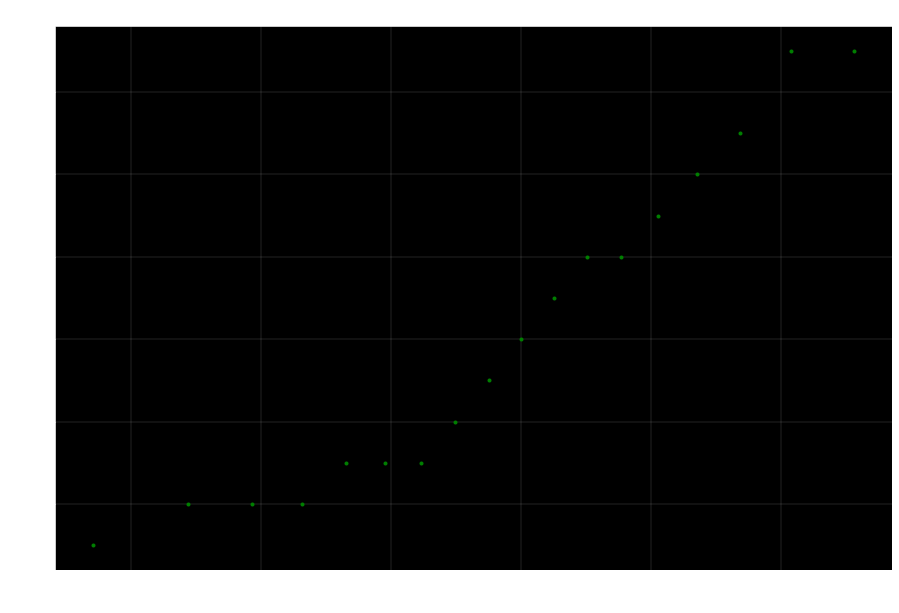

In [32]:
sample = [0.11, 0.07, 0.1, 0.09, 0.17, 0.14, 0.05, 0.05, 0.17, 0.07, 0.06, 0.06, 0.12, 0.12, 0.08, 0.15, 0.07, 0.06, 0.13, 0.17]
my_qq_plot(sample)

–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –Ω–∞—à –≥—Ä–∞—Ñ–∏–∫ —É–∂ —Å–æ–≤—Å–µ–º –æ—Ç–¥–∞–ª–µ–Ω–Ω–æ –Ω–∞–ø–æ–º–∏–Ω–∞–µ—Ç –ø—Ä—è–º—É—é. –ú–∞–ª–æ–≤–µ—Ä–æ—è—Ç–Ω–æ, —á—Ç–æ –Ω–∞—à–∞ –≤—ã–±–æ—Ä–∫–∞ –±—ã–ª–∞ –ø–æ–ª—É—á–µ–Ω–∞ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

---

–î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º, –∞ –∫–∞–∫ –±—É–¥–µ—Ç –≤–µ—Å—Ç–∏ —Å–µ–±—è –Ω–∞—à –≥—Ä–∞—Ñ–∏–∫, –µ—Å–ª–∏ –º—ã –ø—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –¥—Ä—É–≥–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è? –í–æ–∑—å–º–µ–º –≤—ã–±–æ—Ä–∫—É –∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –°—Ç—å—é–¥–µ–Ω—Ç–∞ —Å —Ç—Ä–µ–º—è —Å—Ç–µ–ø–µ–Ω—è–º–∏ —Å–≤–æ–±–æ–¥—ã –∏ —Å—Ä–∞–≤–Ω–∏–º –µ–≥–æ —Å –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º.

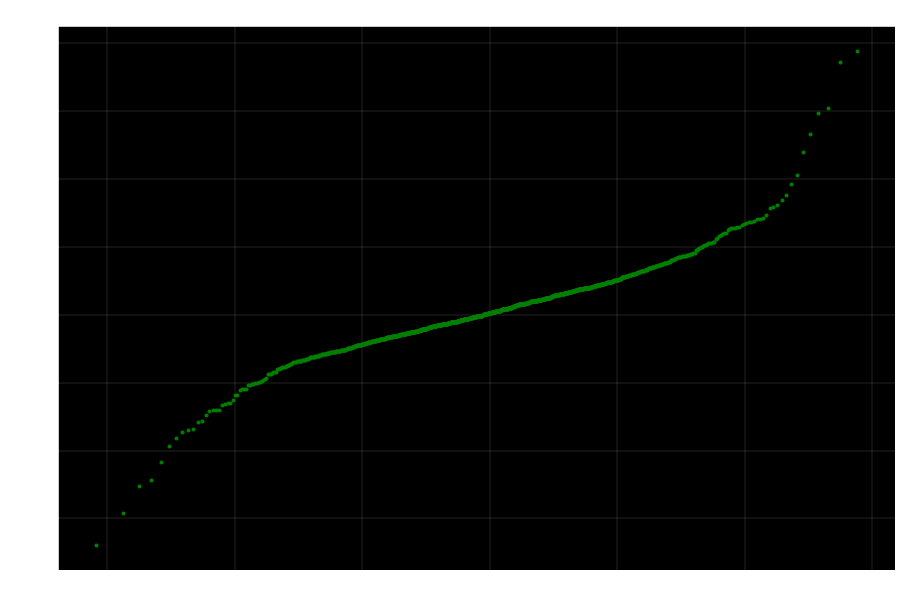

In [33]:
from scipy.stats import t
numpy.random.seed(102)
sample = t(df=3).rvs(size=1000)

my_qq_plot(sample)

–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –Ω–∞—à –≥—Ä–∞—Ñ–∏–∫ –Ω–µ –ø–æ—Ö–æ–∂ –Ω–∞ –ª–∏–Ω–µ–π–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é. –ú–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥: –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ, –Ω–∞—à–∞ –≤—ã–±–æ—Ä–∫–∞ –±—ã–ª–∞ –ø–æ–ª—É—á–µ–Ω–∞ –Ω–µ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

## Statsmodels

–ü–µ—Ä–µ–π–¥–µ–º –∫ –±–∏–±–ª–∏–æ—Ç–µ—á–Ω—ã–º –≤–∞—Ä–∏–∞–Ω—Ç–∞–º –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è Q‚ÄìQ plot. 

[Statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html) ‚Äî –±–∏–±–ª–∏–æ—Ç–µ–∫–∞ –¥–ª—è Q‚ÄìQ plot.

In [34]:
from statsmodels.graphics.gofplots import qqplot

–ü–æ—Å—Ç—Ä–æ–∏–º –≤—ã–±–æ—Ä–∫—É –∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –°—Ç—å—é–¥–µ–Ω—Ç–∞ –∏–∑ –ü—Ä–∏–º–µ—Ä–∞ 3.

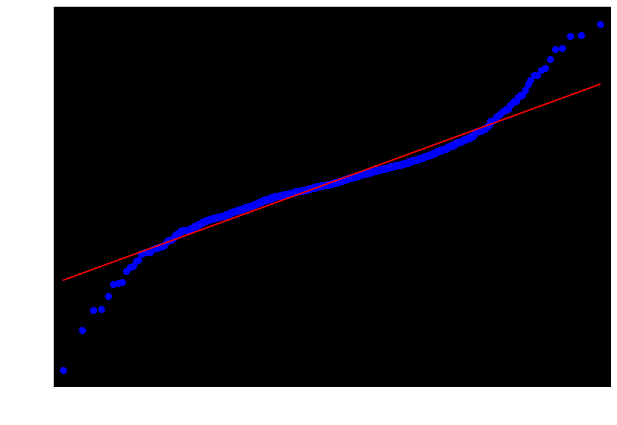

In [35]:
fig = pyplot.figure(figsize=(10, 7))
ax = fig.add_subplot(1,1,1)

qqplot(data=t(df=3).rvs(1000), line='s', ax=ax)
pyplot.show()

–î–∞–ª–µ–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:

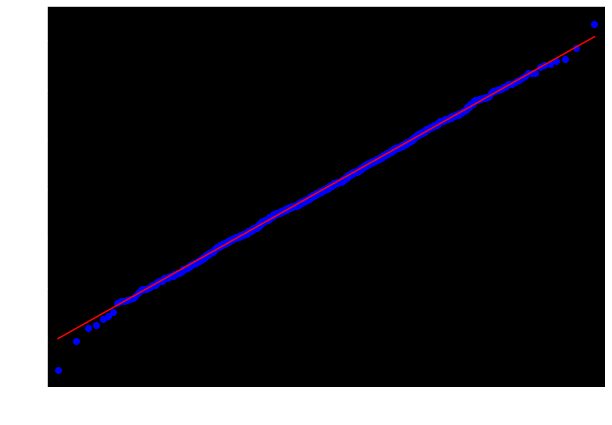

In [36]:
fig = pyplot.figure(figsize=(10, 7))
ax = fig.add_subplot(1,1,1)

qqplot(norm(100, 2).rvs(1000), line='s', ax=ax)
pyplot.show()

–¢–µ–ø–µ—Ä—å —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:

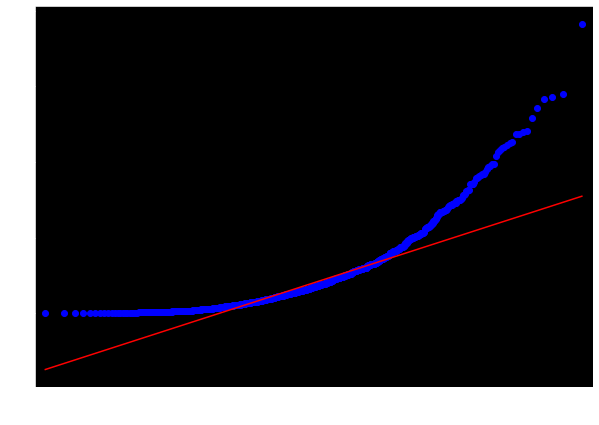

In [37]:
fig = pyplot.figure(figsize=(10, 7))
ax = fig.add_subplot(1,1,1)

qqplot(data=expon.rvs(loc=0, scale=1 / 1, size=1000), line='q', ax=ax)
pyplot.show()

–í–∏–¥–∏–º, —á—Ç–æ —Å–æ–≤—Å–µ–º –Ω–µ –ø–æ—Ö–æ–∂–µ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.

–ò—Ç–∞–∫, Q‚ÄìQ plot ‚Äî —ç—Ç–æ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–º–æ–≥–∞–µ—Ç –Ω–∞–º –≤ –ø—Ä–æ–≤–µ—Ä–∫–µ —Å–ª–æ–∂–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é. 

–ü–ª—é—Å—ã –º–µ—Ç–æ–¥–∞:

- –ì—Ä–∞—Ñ–∏—á–µ—Å–∫–∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø—Ä–æ–∏–ª–ª—é—Å—Ç—Ä–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç—å –≤—ã–±–æ—Ä–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é; 

–ú–∏–Ω—É—Å—ã –º–µ—Ç–æ–¥–∞:

- –ù–µ—Ç –Ω–∏–∫–∞–∫–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è. –ù–µ–ø–æ–Ω—è—Ç–Ω–æ, –≤ –∫–∞–∫–æ–π –º–æ–º–µ–Ω—Ç –≥—Ä–∞—Ñ–∏–∫ –µ—â–µ –ø–æ—Ö–æ–∂ –Ω–∞ –ø—Ä—è–º—É—é, –∞ –≤ –∫–∞–∫–æ–π –Ω–µ—Ç?


----


## –ö—Ä–∏—Ç–µ—Ä–∏–π —Å–æ–≥–ª–∞—Å–∏—è –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ: –Ω—É–∂–µ–Ω –ª–∏ –æ–Ω –¥–ª—è t-test?


–í –¥–∞–Ω–Ω–æ–π —á–∞—Å—Ç–∏ –ª–µ–∫—Ü–∏–∏ –º—ã –ø–æ—Å—Ç–∞—Ä–∞–µ–º—Å—è –æ—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ –≤–æ–ø—Ä–æ—Å: –º–æ–≥—É—Ç –ª–∏ –ø–æ–º–æ—á—å –∫—Ä–∏—Ç–µ—Ä–∏–∏ —Å–æ–≥–ª–∞—Å–∏—è –¥–ª—è t-test?

–ö–∞–∫ –º—ã —É–∂–µ –∑–Ω–∞–µ–º  –∏–∑ –ø—Ä–æ—à–ª—ã—Ö –ª–µ–∫—Ü–∏–π, –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö –Ω–∏–∫–æ–≥–¥–∞ –Ω–µ –Ω—É–∂–Ω–∞ –±—ã–ª–∞ –¥–ª—è t-test. –ù–æ –Ω–µ –≤—Å–µ –æ–± —ç—Ç–æ–º –∑–Ω–∞—é—Ç! –ü–æ—ç—Ç–æ–º—É –º–Ω–æ–≥–∏–µ –∞–Ω–∞–ª–∏—Ç–∏–∫–∏ –ª—é–±—è—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–∞–∫—É—é –ø—Ä–æ—Ü–µ–¥—É—Ä—É:

- –°–Ω–∞—á–∞–ª–∞ –º—ã –ø—Ä–æ–≤–µ—Ä—è–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å. 
- –ï—Å–ª–∏ —Ç–µ—Å—Ç –Ω–µ –æ—Ç–≤–µ—Ä–≥—Å—è –º—ã —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã –∏ t-test –º–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω—è—Ç—å.
    - –ê –µ—Å–ª–∏ –æ—Ç–≤–µ—Ä–≥—Å—è, —Ç–æ t-test –Ω–µ–ø—Ä–∏–º–µ–Ω–∏–º.
    
–î–∞–≤–∞–π—Ç–µ —ç—Ç–æ –ø—Ä–æ–≤–µ—Ä–∏–º! –ö–∞–∫ –∏–º–µ–Ω–Ω–æ? –° –ø–æ–º–æ—â—å—é –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ! **–ù–æ —Ç–æ–ª—å–∫–æ –º—ã –ø—Ä–æ–≤–µ—Ä–∏–º "–Ω–∞–æ–±–æ—Ä–æ—Ç"**: –º—ã –±—É–¥–µ–º –∑–∞–ø—É—Å–∫–∞—Ç—å t-test —Ç–æ–ª—å–∫–æ —Ç–æ–≥–¥–∞, –∫–æ–≥–¥–∞ –®–∞–ø–∏—Ä–æ –æ—Ç–≤–µ—Ä–≥ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö!

–í –∫–∞—á–µ—Å—Ç–≤–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏ –≤–æ–∑—å–º–µ–º —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.

In [47]:
numpy.random.seed(35)
N_exps = 1000
sample_size = 1000
bad_cnt=0
alpha=0.05

mean=10
dist = expon(scale = mean)
sz = 0

for i in range(N_exps):
    # –ì–µ–Ω–µ—Ä–∏—Ä—É—é –≤—ã–±–æ—Ä–∫—É
    sample = dist.rvs(sample_size)

    # –ü—Ä–æ–≤–µ—Ä—è–µ–º –≤—ã–±–æ—Ä–∫—É –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å
    if shapiro(sample).pvalue > 0.05 :
        continue
        
    # –ú—ã –ø–æ–ø–∞–ª–∏ —Å—é–¥–∞ —Ç–æ–ª—å–∫–æ —Ç–æ–≥–¥–∞, –∫–æ–≥–¥–∞ –æ—Ç–≤–µ—Ä–≥—Å—è –∫—Ä–∏—Ç–µ—Ä–∏–π –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö
    # –ó–∞–ø—É—Å–∫–∞—é –∫—Ä–∏—Ç–µ—Ä–∏–π –∏ —Å—á–∏—Ç–∞—é p-value
    pvalue = ttest_1samp(sample, popmean=mean).pvalue

    # –ü—Ä–æ–≤–µ—Ä—è—é, —á—Ç–æ pvalue < alpha
    bad_cnt += (pvalue < alpha)
    sz += 1

print(f"–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç–≤–µ—Ä–∂–µ–Ω–∏–π –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å:  {round(sz/N_exps * 100, 0)}%")
print(f"FPR: {round(bad_cnt / sz, 4)}")
print(f"CI={proportion_confint(count = bad_cnt, nobs = sz, alpha=0.05, method='wilson')}")


–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç–≤–µ—Ä–∂–µ–Ω–∏–π –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å:  100.0%
FPR: 0.054
CI=(0.04162131372306272, 0.06979215484605245)


–ß—Ç–æ –º—ã –≤–∏–¥–∏–º? –ö—Ä–∏—Ç–µ—Ä–∏–π –≤—Å–µ —Ç–∞–∫–∂–µ –æ—à–∏–±–∞–µ—Ç—Å—è –≤ 5% —Å–ª—É—á–∞–µ–≤! –ö—Ä–∏—Ç–µ—Ä–∏–π –®–∞–ø–∏—Ä–æ –æ—Ç–≤–µ—Ä–≥ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å, –∞ t-test –≤—Å–µ —Ä–∞–≤–Ω–æ —Ä–∞–±–æ—Ç–∞–µ—Ç! –ê –∑–Ω–∞—á–∏—Ç –º—ã –ø–æ–∫–∞–∑–∞–ª–∏, —á—Ç–æ –∫—Ä–∏—Ç–µ—Ä–∏–π —Å–æ–≥–ª–∞—Å–∏—è –±–µ—Å–ø–æ–ª–µ–∑–µ–Ω!

----


–ù–æ —á—Ç–æ, –µ—Å–ª–∏ –≤—ã–±–æ—Ä–∫–∞ –º–∞–ª–µ–Ω—å–∫–∞—è? –í –ø—Ä–æ—à–ª—ã–π —Ä–∞–∑ –º—ã –≥–æ–≤–æ—Ä–∏–ª–∏, —á—Ç–æ –Ω—É–∂–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ.
–ù–æ –µ—Å–ª–∏ –≤—ã –Ω–µ –º–æ–∂–µ—Ç–µ —ç—Ç–æ–≥–æ —Å–¥–µ–ª–∞—Ç—å? –ù–∞–ø—Ä–∏–º–µ—Ä, —É –≤–∞—Å –Ω–µ—Ç –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö, –∏ –≤—ã–±–æ—Ä–∫–∞ —Ç–æ–ª—å–∫–æ –Ω–∞—á–∞–ª–∞ —Å–æ–±–∏—Ä–∞—Ç—å—Å—è. –ú–æ–∂–µ—Ç –ª–∏ –ø–æ–º–æ—á—å –ø—Ä–æ—Ü–µ–¥—É—Ä–∞ –æ–ø–∏—Å–∞–Ω–Ω–∞—è –≤—ã—à–µ?


**–¢–æ –µ—Å—Ç—å –≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç –ø—Ä–∏–º–µ—Ä–∞ –≤—ã—à–µ, –º—ã –±—É–¥–µ–º –ø—Ä–æ–≤–µ—Ä—è—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–∞ –º–∞–ª–µ–Ω—å–∫–∏—Ö –≤—ã–±–æ—Ä–∫–∞—Ö!** –ü—Ä–æ–≤–µ—Ä–∏–º –µ–µ –Ω–∞ –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ. –î–ª—è —á–µ—Å—Ç–Ω–æ—Å—Ç–∏ –±—É–¥–µ–º —Å–º–æ—Ç—Ä–µ—Ç—å —Ç–æ–ª—å–∫–æ —Ç–µ –∏—Å—Ö–æ–¥—ã, –∫–æ–≥–¥–∞ –∫—Ä–∏—Ç–µ—Ä–∏–∏ —Å–æ–≥–ª–∞—Å–∏—è –Ω–µ –æ—Ç–≤–µ—Ä–≥–ª–∏—Å—å.

In [58]:
numpy.random.seed(35)
N_exps = 10000
sample_size = 5
bad_cnt=0
alpha=0.05

mean=10
dist = expon(scale = mean)
sz = 0

for i in range(N_exps):
    # –ì–µ–Ω–µ—Ä–∏—Ä—É—é –≤—ã–±–æ—Ä–∫—É
    sample    = dist.rvs(sample_size)

    # –ü—Ä–æ–≤–µ—Ä—è–µ–º –≤—ã–±–æ—Ä–∫—É –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å
    if shapiro(sample).pvalue < 0.05 :
        # –Ω–µ –∏–¥–µ–º –¥–∞–ª—å—à–µ, –µ—Å–ª–∏ –∫—Ä–∏–µ—Ç—Ä–∏–π –æ—Ç–≤–µ—Ä–≥—Å—è
        continue
        
    # –ó–∞–ø—É—Å–∫–∞—é –∫—Ä–∏—Ç–µ—Ä–∏–π –∏ —Å—á–∏—Ç–∞—é p-value
    pvalue = ttest_1samp(sample, popmean=mean).pvalue

    # –ü—Ä–æ–≤–µ—Ä—è—é, —á—Ç–æ pvalue < alpha
    bad_cnt += (pvalue < alpha)
    sz += 1

print(f"–ö—Ä–∏—Ç–µ—Ä–∏–π —Å–æ–≥–ª–∞—Å–∏—è –Ω–µ –æ—Ç–≤–µ—Ä–≥—Å—è –¥–ª—è —Ç–µ—Å—Ç–∞ –∏ –∫–æ–Ω—Ç—Ä–æ–ª—è –≤ {round(sz/N_exps * 100, 0)}% —Å–ª—É—á–∞–µ–≤")
print(f"FPR: {round(bad_cnt / sz, 4)}")
print(f"CI={proportion_confint(count = bad_cnt, nobs = sz, alpha=0.05, method='wilson')}")


–ö—Ä–∏—Ç–µ—Ä–∏–π —Å–æ–≥–ª–∞—Å–∏—è –Ω–µ –æ—Ç–≤–µ—Ä–≥—Å—è –¥–ª—è —Ç–µ—Å—Ç–∞ –∏ –∫–æ–Ω—Ç—Ä–æ–ª—è –≤ 84.0% —Å–ª—É—á–∞–µ–≤
FPR: 0.124
CI=(0.11709147118543192, 0.1311964857651455)


–ö–∞–∫ –º—ã –≤–∏–¥–∏–º, –∫—Ä–∏—Ç–µ—Ä–∏–π —Å–æ–≥–ª–∞—Å–∏—è —Ç—É—Ç –Ω–µ –ø–æ–º–æ–≥.

**–ú–æ—Ä–∞–ª—å:** –∫—Ä–∏—Ç–µ—Ä–∏–∏ —Å–æ–≥–ª–∞—Å–∏—è –Ω–∏–∫–æ–≥–¥–∞ –Ω–µ –Ω—É–∂–Ω—ã –¥–ª—è t-test. –í —Å–ª—É—á–∞–µ, –µ—Å–ª–∏ –≤—ã –Ω–µ –º–æ–∂–µ—Ç–µ –∑–∞–ø—É—Å—Ç–∏—Ç—å –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ, **—Ç–æ –æ–ø–∏—Ä–∞—Ç—å—Å—è –Ω–∞ –∫—Ä–∏—Ç–µ—Ä–∏–∏ —Å–æ–≥–ª–∞—Å–∏—è –≤—ã —Ç–∞–∫–∂–µ –Ω–µ –º–æ–∂–µ—Ç–µ!**

# –ò—Ç–æ–≥

–ù–∞ —ç—Ç–æ–º –∑–∞–Ω—è—Ç–∏–∏ –º—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–ª–∏ —Å –≤–∞–º–∏ —Ä–∞–∑–Ω—ã–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏ —Å–æ–≥–ª–∞—Å–∏—è: 
- –ü—Ä–æ—Å—Ç—ã–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏:
    - –í —ç—Ç–æ–º —Å–ª—É—á–∞–µ –º—ã —Ä–∞–∑–æ–±—Ä–∞–ª–∏, –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞.
        - –£–∑–Ω–∞–ª–∏, —á—Ç–æ –æ–Ω –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –≤ —Å–ª—É—á–∞–µ –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π.
- –°–ª–æ–∂–Ω—ã–µ. –ó–¥–µ—Å—å –º—ã —Ä–∞–∑–æ–±—Ä–∞–ª–∏ —Ä–∞–∑–Ω—ã–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é:
    - –ö—Ä–∏—Ç–µ—Ä–∏–π –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞ —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π –õ–∏–ª–ª–∏–µ—Ñ–æ—Ä—Å–∞
    - –ö—Ä–∏—Ç–µ—Ä–∏–π –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞
    - –ú–µ—Ç–æ–¥ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ QQ-plot.
- –ê —Ç–∞–∫–∂–µ –ø–æ–∫–∞–∑–∞–ª–∏, —á—Ç–æ –∫—Ä–∏—Ç–µ—Ä–∏–∏ —Å–æ–≥–ª–∞—Å–∏—è –º–æ–≥—É—Ç –±—ã—Ç—å **–≤—Ä–µ–¥–Ω—ã–º–∏ –¥–ª—è t-test**
	- –≤ —Å–ª—É—á–∞–µ –±–æ–ª—å—à–∏—Ö –≤—ã–±–æ—Ä–æ–∫ –ø—Ä–∏ –æ—Ç–≤–µ—Ä–∂–µ–Ω–∏–∏ –≥–∏–ø–æ—Ç–µ–∑—ã –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –≤—ã –º–æ–∂–µ—Ç–µ –æ—à–∏–±–æ—á–Ω–æ –æ—Ç–∫–∞–∑–∞—Ç—å—Å—è –æ—Ç –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è t-test, –Ω–æ t-test –º—ã –º–æ–∂–µ–º –ø—Ä–∏–º–µ–Ω—è—Ç—å –¥–∞–∂–µ –≤ —Å–ª—É—á–∞–µ –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö!
	- –≤ —Å–ª—É—á–∞–µ –º–∞–ª–µ–Ω—å–∫–∏—Ö –≤—ã–±–æ—Ä–æ–∫ –¥–∞–∂–µ –µ—Å–ª–∏ –≥–∏–ø–æ—Ç–µ–∑–∞ –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –ù–ï –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è, t-test –ø—Ä–∏–º–µ–Ω—è—Ç—å –≤—Å–µ —Ä–∞–≤–Ω–æ –Ω–µ–ª—å–∑—è!